# Simple forecasting methods

In [32]:
# Carregar Bibliotecas
library(ggplot2)
library(forecast)
library(dplyr)
library(xts)
library(tidyverse)

In [2]:
path <- "https://raw.githubusercontent.com/E-man85/projectII/main/dataStaging/grainWeekMultipleVariables.csv"
df <- read.csv(path)
df <- df[, c('store_id','date', 'summed_revenue')]
rm(path)
head(df)
str(df)
dim(df)

,store_id,date,summed_revenue
,<chr>,<chr>,<dbl>
1,S0002,2017-01-08,1813.24
2,S0002,2017-01-15,1896.91
3,S0002,2017-01-22,7404.16
4,S0002,2017-01-29,2078.39
5,S0002,2017-02-05,1745.47
6,S0002,2017-02-12,2235.39


'data.frame':	8301 obs. of  3 variables:
 $ store_id      : chr  "S0002" "S0002" "S0002" "S0002" ...
 $ date          : chr  "2017-01-08" "2017-01-15" "2017-01-22" "2017-01-29" ...
 $ summed_revenue: num  1813 1897 7404 2078 1745 ...


[1] 8301    3

## Data Preparation

In [3]:
# Alterar tipo da coluna date
df$date <- as.Date(df$date)
# Criar variável com lista das lojas unicas
stores <- unique(df$store_id)
# Lista para armazenar os dataframes
df_list <- list()
# Loop para criar os dataframes separados
for (store in stores) {
  # filtrar dataframe
  df_store <- df[df$store_id == store,]
  # Adicionar dataframe à lista
  df_list[[store]] <- df_store
}
# Dividir dados treino e teste
# lista para armazenar os timeseries teste e treino
df_train <- list()
df_test <- list()
# Loop para criar as séries temporais semanais e armazenar nas lista
for (t in names(df_list)) {
  data <- df_list[[t]]
  train <- head(data, -5)
  test <- tail(data, 5)
  df_train[[t]] <- train
  df_test[[t]] <- test
}
# Converter em timeseries ts cada elemento da lista
# lista para armazenar os timeseries 
ts_real <- list()
ts_train <- list()
ts_test <- list()
# Loop
for(t in names(df_list)){
    data <- df_list[[t]]
    ts <- ts(data = data$summed_revenue, frequency = 52)
    ts_real[[t]] <- ts
}
# Loop
for(t in names(df_train)){
    data <- df_train[[t]]
    ts <- ts(data = data$summed_revenue, frequency = 52)
    ts_train[[t]] <- ts
}
# Loop
for(t in names(df_test)){
    data <- df_test[[t]]
    ts <- ts(data = data$summed_revenue, frequency = 52)
    ts_test[[t]] <- ts
}
length(ts_train)
length(ts_test)
length(ts_real)

[1] 63

[1] 63

[1] 63

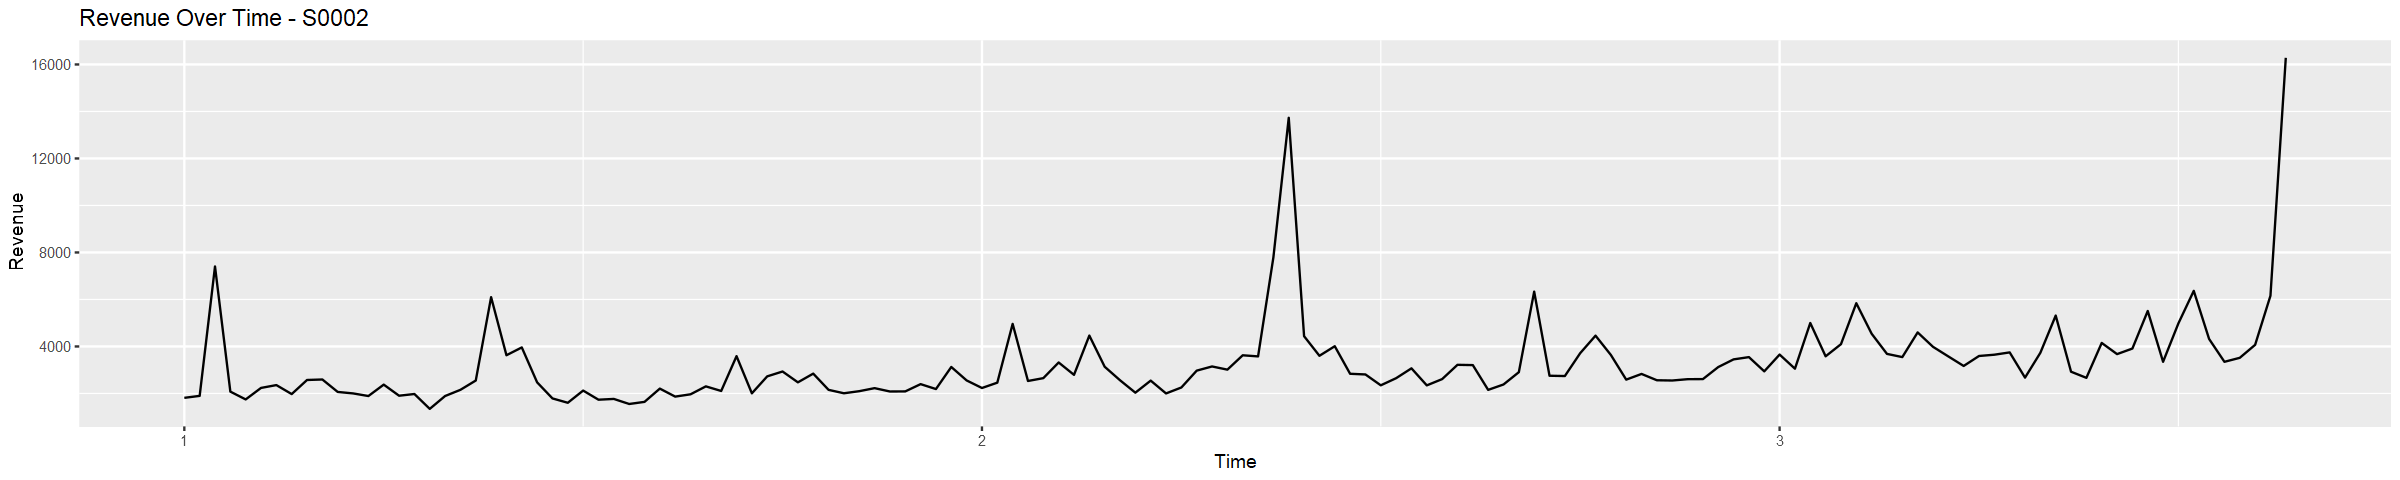

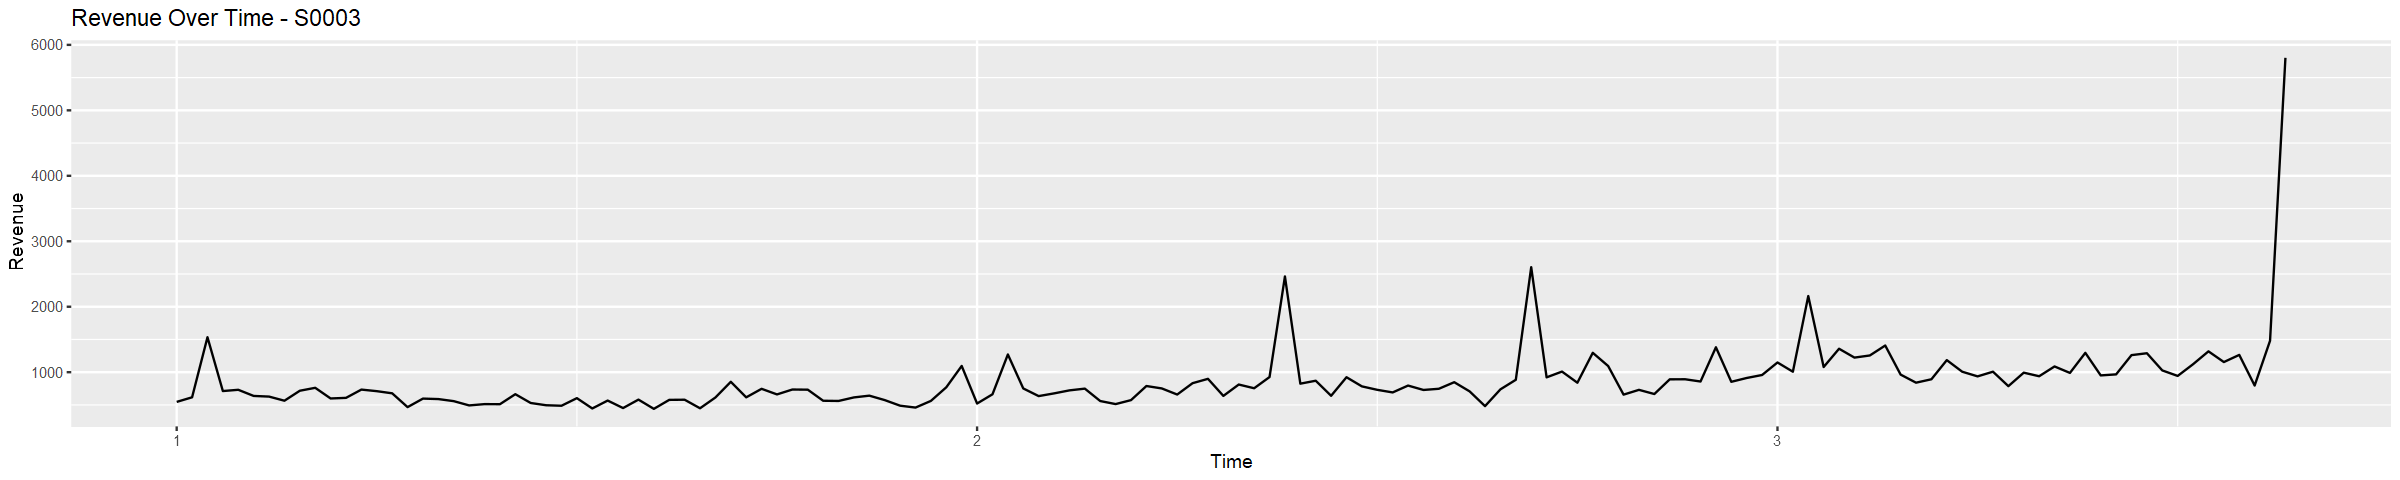

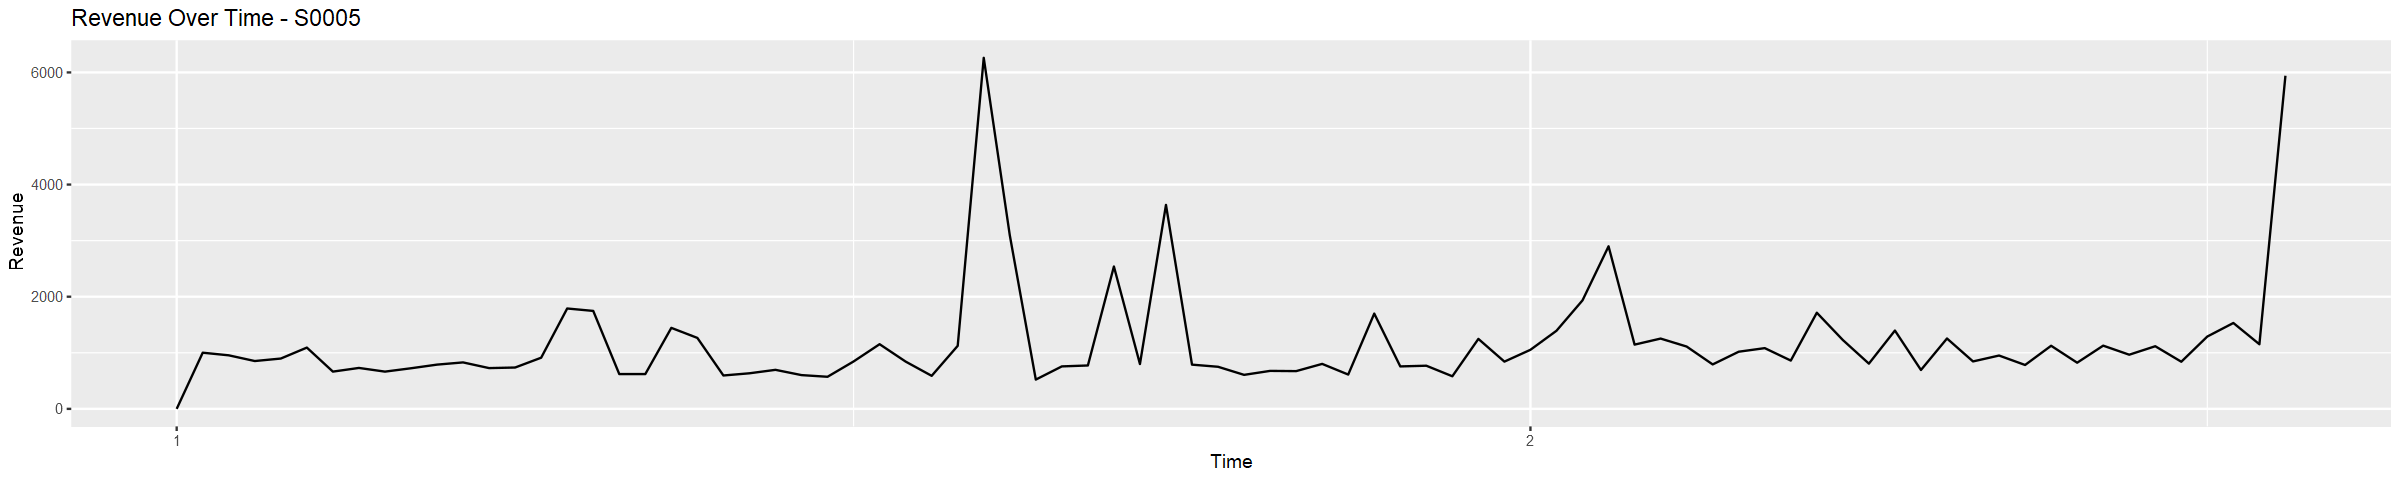

In [4]:
# Observações vs Tempo ex 3 primeiras lojas
options(repr.plot.width = 20, repr.plot.height = 4)
for (i in 1:length(ts_train)) {
  ts_name <- names(ts_train)[i]
  ts <- ts_train[[ts_name]]
  
  # Plotar a série temporal para os 3 primeiros elementos
  if (i <= 3) {
    plot <- autoplot(ts) +
      ggtitle(paste("Revenue Over Time -", ts_name)) +
      xlab("Time") +
      ylab("Revenue")
    
    # Exibir o gráfico
    print(plot)
  }
}

In [5]:
# Decompose ts como exemplo a primeira da lista
dec <- decompose(ts_train[[1]]) 
dec

$x
Time Series:
Start = c(1, 1) 
End = c(3, 34) 
Frequency = 52 
  [1]  1813.24  1896.91  7404.16  2078.39  1745.47  2235.39  2356.01  1973.80
  [9]  2573.37  2594.16  2064.74  2001.88  1890.32  2375.89  1903.69  1976.66
 [17]  1344.25  1890.46  2154.86  2550.11  6097.26  3626.28  3958.66  2472.34
 [25]  1788.50  1603.02  2122.74  1734.00  1767.14  1551.87  1641.40  2206.39
 [33]  1865.82  1963.61  2301.41  2105.77  3587.69  2005.43  2727.31  2934.19
 [41]  2473.18  2843.82  2153.29  2007.78  2096.73  2225.73  2083.53  2087.13
 [49]  2396.83  2187.45  3126.87  2554.28  2232.36  2459.07  4959.87  2531.08
 [57]  2651.46  3318.19  2792.04  4462.69  3136.89  2562.01  2032.89  2546.42
 [65]  2000.69  2254.15  2971.12  3148.83  3013.51  3624.29  3577.06  7796.56
 [73] 13731.16  4436.39  3603.06  4009.99  2837.63  2808.51  2346.45  2649.95
 [81]  3068.91  2343.79  2610.58  3218.72  3206.64  2152.37  2381.59  2904.98
 [89]  6333.15  2753.73  2741.11  3714.50  4459.90  3638.16  2588.56  2830.50

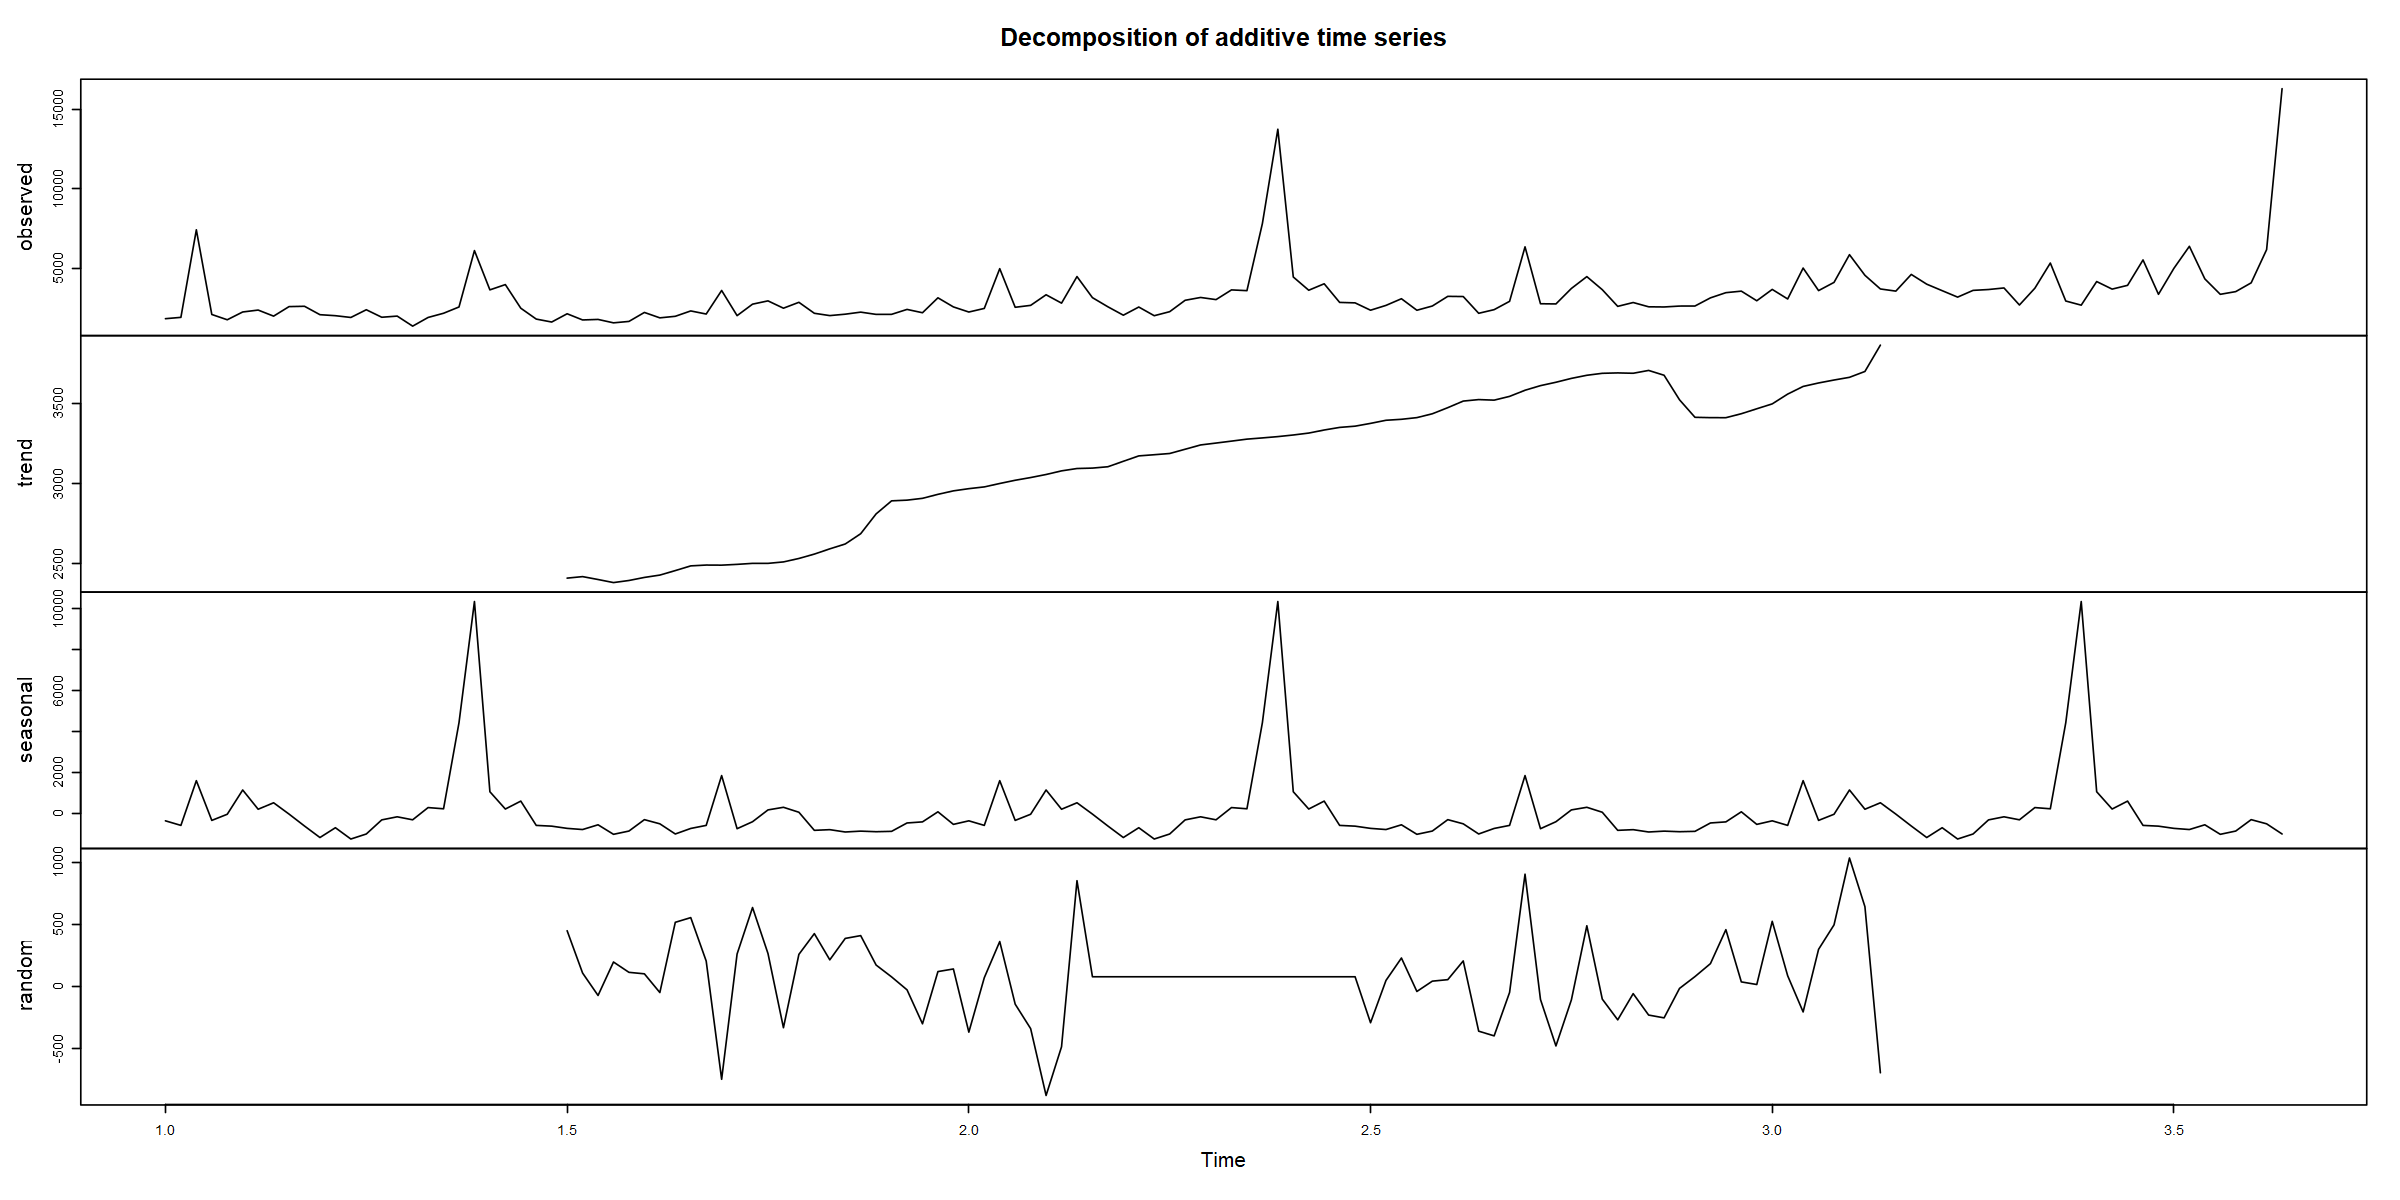

In [6]:
# Decompose Graficamente
options(repr.plot.width = 20, repr.plot.height = 10)
plot(dec)

## Average method

In [7]:
# Previsoes com dados treino, para 5 periodos
# Armazenar previsões
avg_prev <- list()
# loop
for (i in names(ts_train)){
    data <- ts_train[[i]]
    avg_model <- meanf(data,5)
    avg_forecast <- avg_model$mean
    # Arredordar 2 casas decimais
    avg_forecast <- round(avg_forecast, 2)
    avg_prev[[paste(i,'-avg', sep= "")]] <- avg_forecast
}
length(avg_prev)

[1] 63

Com o average method as previsões de todos os valores futuros são iguais à média (ou “média”) dos dados históricos.

In [8]:
# Resumo modelo ultima loja
summary(avg_model)


Forecast method: Mean

Model Information:
$mu
[1] 371.5003

$mu.se
[1] 11.54457

$sd
[1] 135.618

$bootstrap
[1] FALSE

$call
meanf(y = data, h = 5)

attr(,"class")
[1] "meanf"

Error measures:
                        ME     RMSE      MAE       MPE     MAPE      MASE
Training set -1.651417e-14 135.1257 95.63221 -11.02004 27.67587 0.7021586
                  ACF1
Training set 0.4165589

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
3.653846       371.5003 196.2251 546.7755 102.3552 640.6454
3.673077       371.5003 196.2251 546.7755 102.3552 640.6454
3.692308       371.5003 196.2251 546.7755 102.3552 640.6454
3.711538       371.5003 196.2251 546.7755 102.3552 640.6454
3.730769       371.5003 196.2251 546.7755 102.3552 640.6454


	Ljung-Box test

data:  Residuals from Mean
Q* = 294.71, df = 28, p-value < 2.2e-16

Model df: 0.   Total lags used: 28



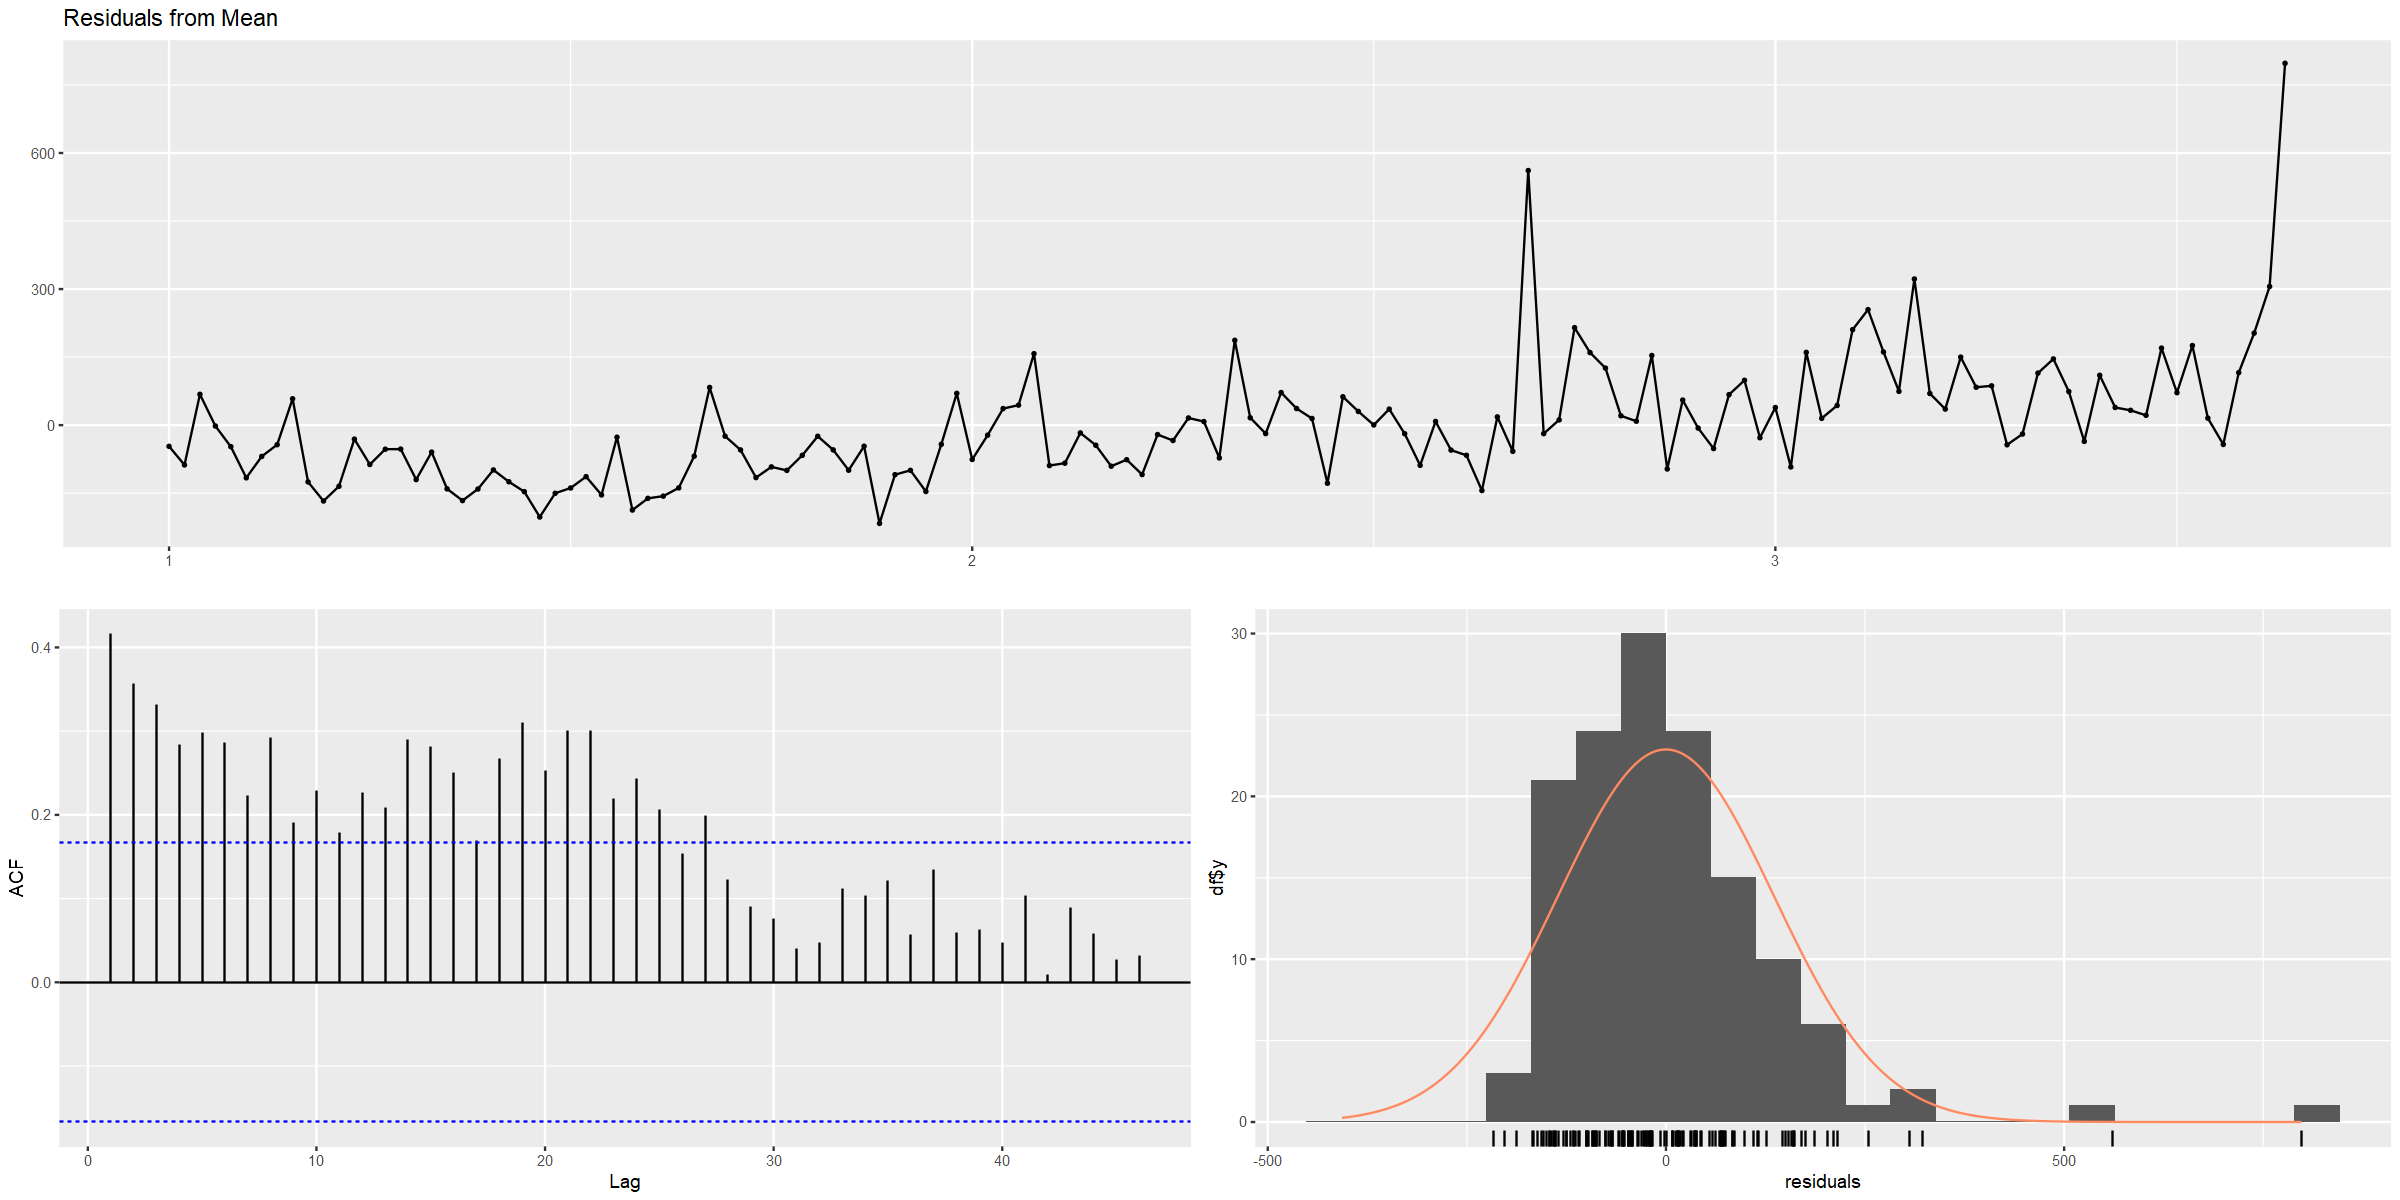

In [9]:
#Ver Resuiduos ultimo modelo
options(repr.plot.width = 20, repr.plot.height = 10)
checkresiduals(avg_model)

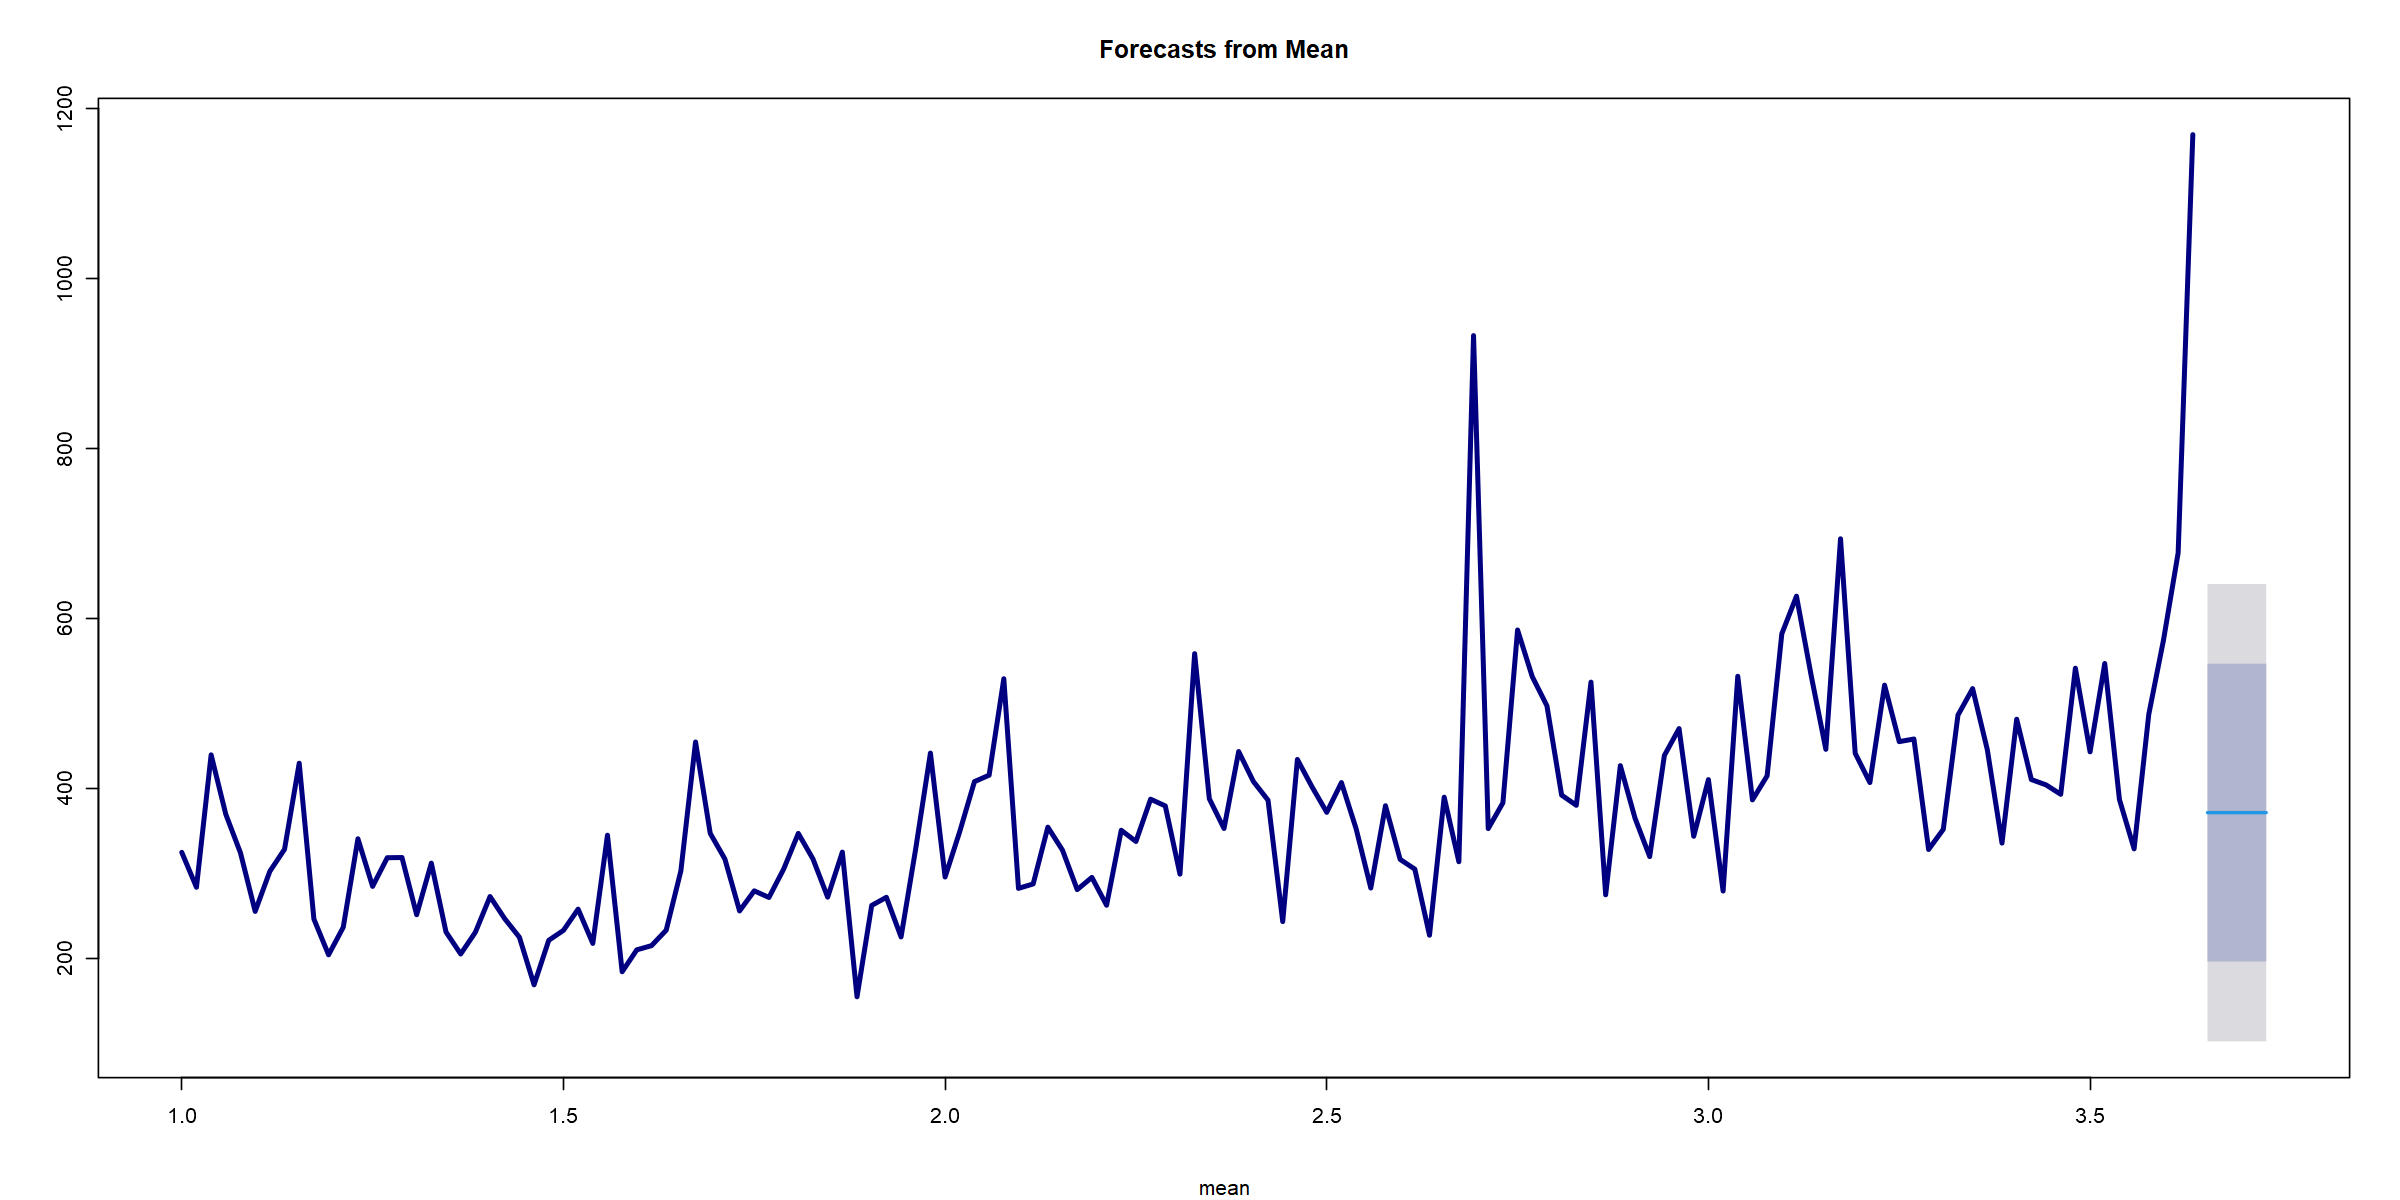

In [10]:
# Ver previsões
options(repr.plot.width = 20, repr.plot.height = 10)
predict_avg_model <- avg_model
plot(predict_avg_model,
     sub = "mean",
     col = "navyblue",
     lwd = 3)

In [11]:
# Ver dataframe de valores reais
prev <- do.call(rbind, df_test)
# Inserir o nome dos dataframes como uma coluna chamada "Nome"
prev$store_id <- rep(names(df_test), sapply(df_test, nrow))
head(prev)

,store_id,date,summed_revenue
,<chr>,<date>,<dbl>
S0002.139,S0002,2019-09-01,4164.56
S0002.140,S0002,2019-09-08,6267.91
S0002.141,S0002,2019-09-15,5007.57
S0002.142,S0002,2019-09-22,3074.56
S0002.143,S0002,2019-09-29,5728.25
S0003.282,S0003,2019-09-01,1030.02


In [12]:
# Criar dataframe com resultados do modelo Average
avg_df <- data.frame(avg_prev)
avg_df <- t(avg_df)
avg_df <- as.data.frame(avg_df)
# Adicionar o índice como coluna
avg_df <- rownames_to_column(avg_df, var = "store_id")
# Transformação para o formato "long"
avg_df <- avg_df %>%
  pivot_longer(cols = -store_id, names_to = "prev", values_to = "revenue")
# Acrescentar as previsões ao dataframe prev
prev$avg_prev <- avg_df$revenue
# Ver 10 linhas aleatórias
head(prev)

,store_id,date,summed_revenue,avg_prev
,<chr>,<date>,<dbl>,<dbl>
S0002.139,S0002,2019-09-01,4164.56,3262.42
S0002.140,S0002,2019-09-08,6267.91,3262.42
S0002.141,S0002,2019-09-15,5007.57,3262.42
S0002.142,S0002,2019-09-22,3074.56,3262.42
S0002.143,S0002,2019-09-29,5728.25,3262.42
S0003.282,S0003,2019-09-01,1030.02,874.90


## Naïve method

In [13]:
# Previsoes com dados treino, para 5 periodos
# Armazenar previsões
naive_prev <- list()
# loop
for (i in names(ts_train)){
    data <- ts_train[[i]]
    naive_model <- naive(data,5)
    naive_forecast <- naive_model$mean 
    #rwf(y, h) # Equivalent alternative
    # Arredordar 2 casas decimais
    naive_forecast <- round(naive_forecast, 2)
    naive_prev[[paste(i,'-naive', sep= "")]] <- naive_forecast
}
length(naive_prev)
# Criar dataframe com resultados do modelo Naive
naive_df <- data.frame(naive_prev)
naive_df <- t(naive_df)
naive_df <- as.data.frame(naive_df)
# Adicionar o índice como coluna
naive_df <- rownames_to_column(naive_df, var = "store_id")
# Transformação para o formato "long"
naive_df <- naive_df %>%
  pivot_longer(cols = -store_id, names_to = "prev", values_to = "revenue")


[1] 63

Para previsões Naive, simplesmente definimos todas as previsões como o valor da última observação.

In [14]:
# Resumo modelo ultima loja
summary(naive_model)


Forecast method: Naive method

Model Information:
Call: naive(y = data, h = 5) 

Residual sd: 129.6111 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 6.165109 129.6111 89.38088 -3.646716 23.82664 0.6562596 -0.4059113

Forecasts:
         Point Forecast     Lo 80    Hi 80    Lo 95    Hi 95
3.653846        1169.36 1003.2567 1335.463 915.3269 1423.393
3.673077        1169.36  934.4544 1404.266 810.1029 1528.617
3.692308        1169.36  881.6606 1457.059 729.3617 1609.358
3.711538        1169.36  837.1533 1501.567 661.2938 1677.426
3.730769        1169.36  797.9417 1540.778 601.3247 1737.395


	Ljung-Box test

data:  Residuals from Naive method
Q* = 55.663, df = 28, p-value = 0.001414

Model df: 0.   Total lags used: 28



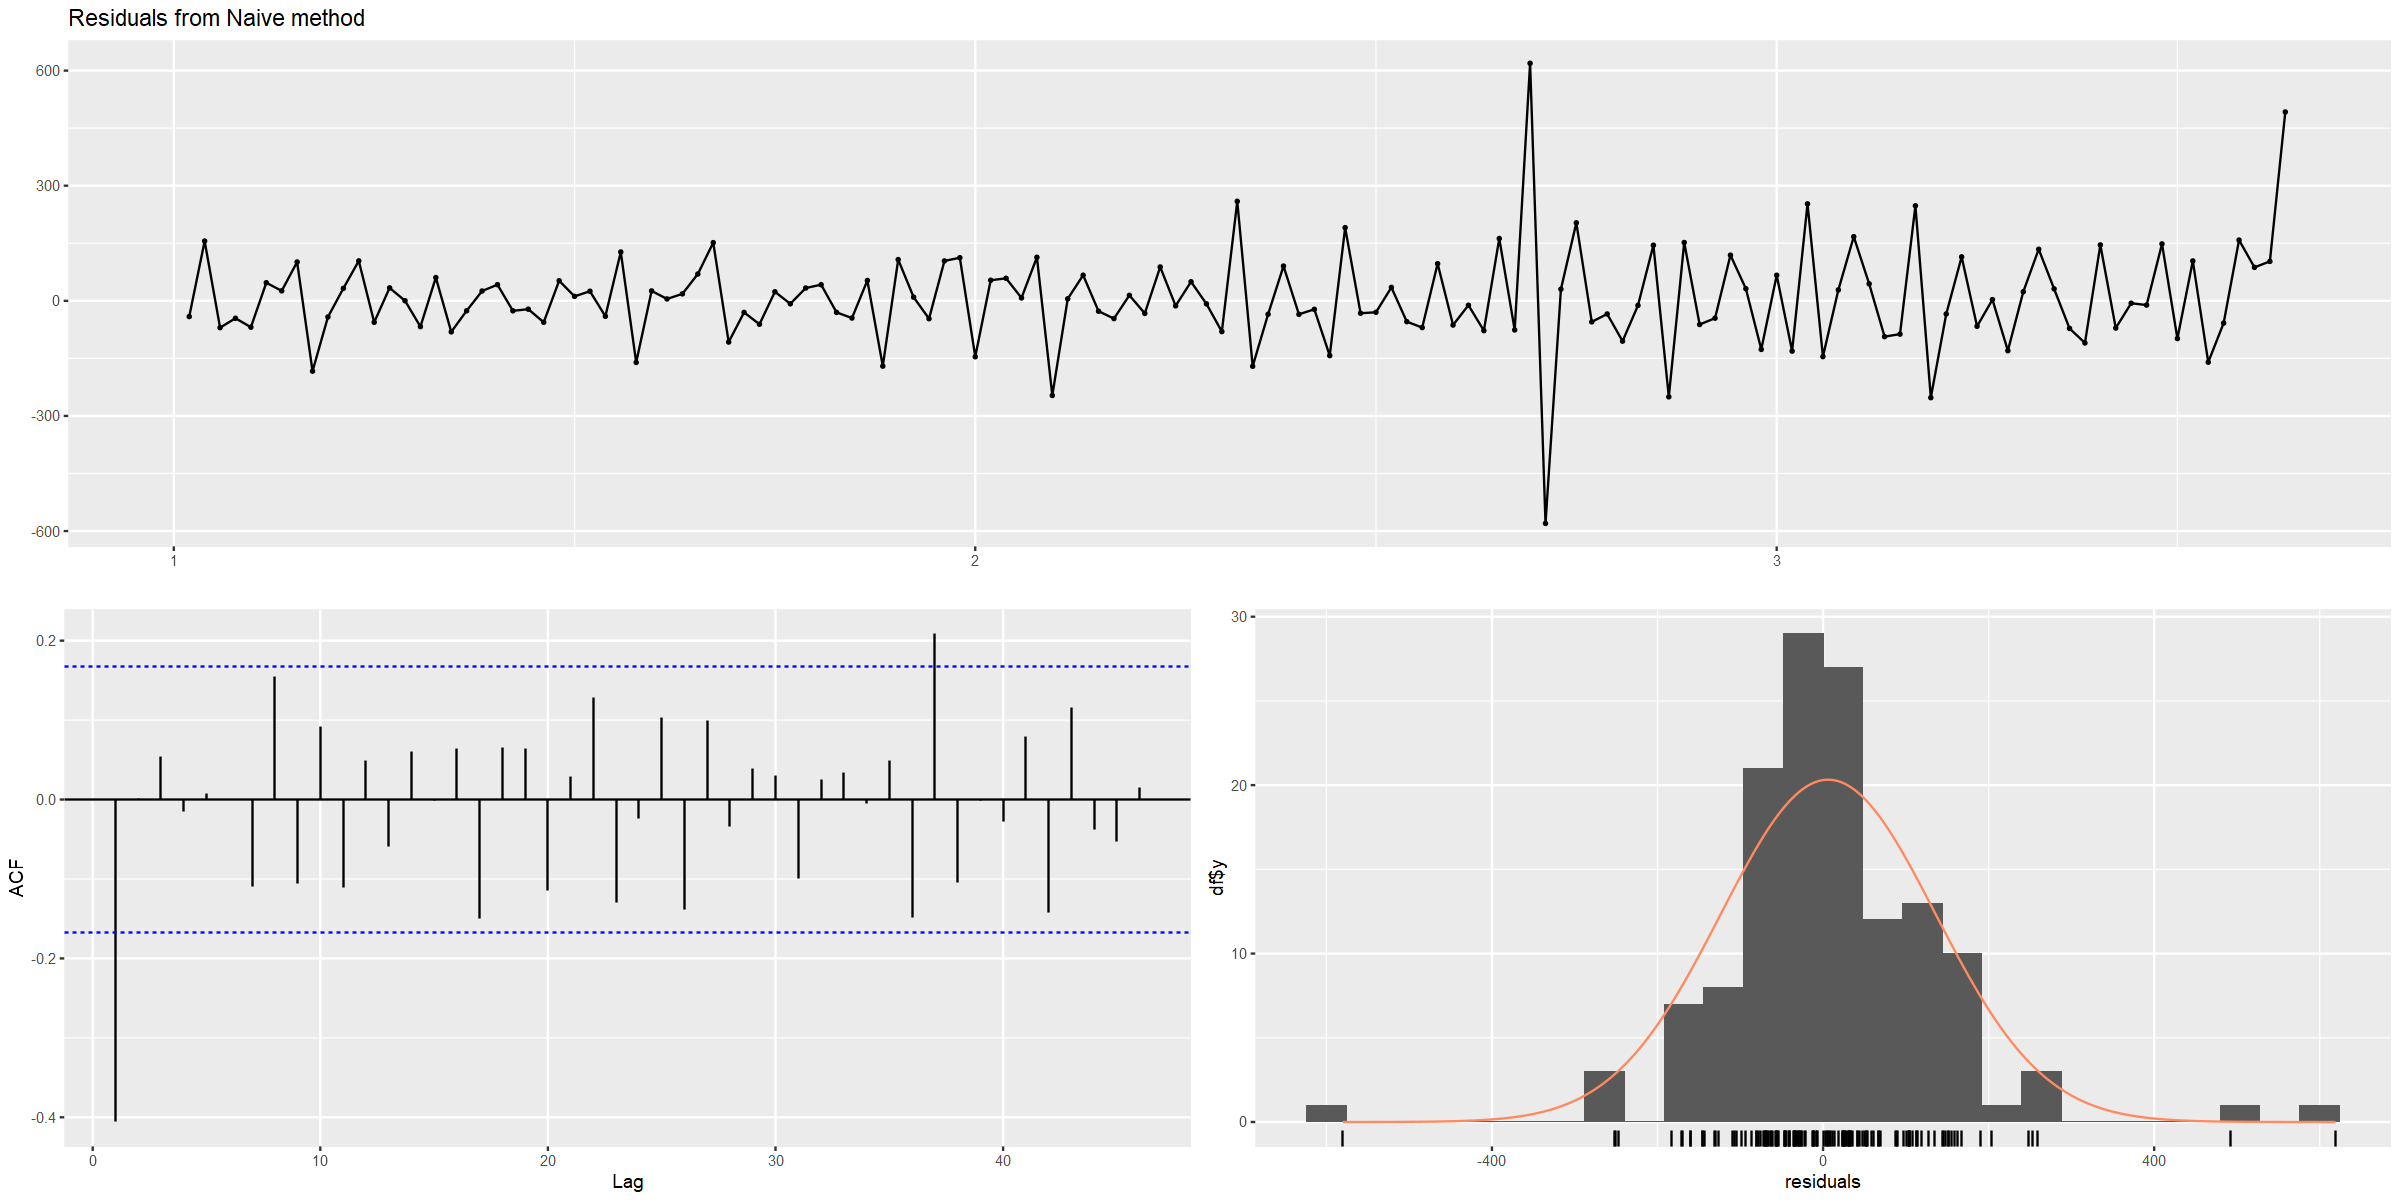

In [15]:
# Ver resuiduos modelo ultima loja da lista
options(repr.plot.width = 20, repr.plot.height = 10)
checkresiduals(naive_model)

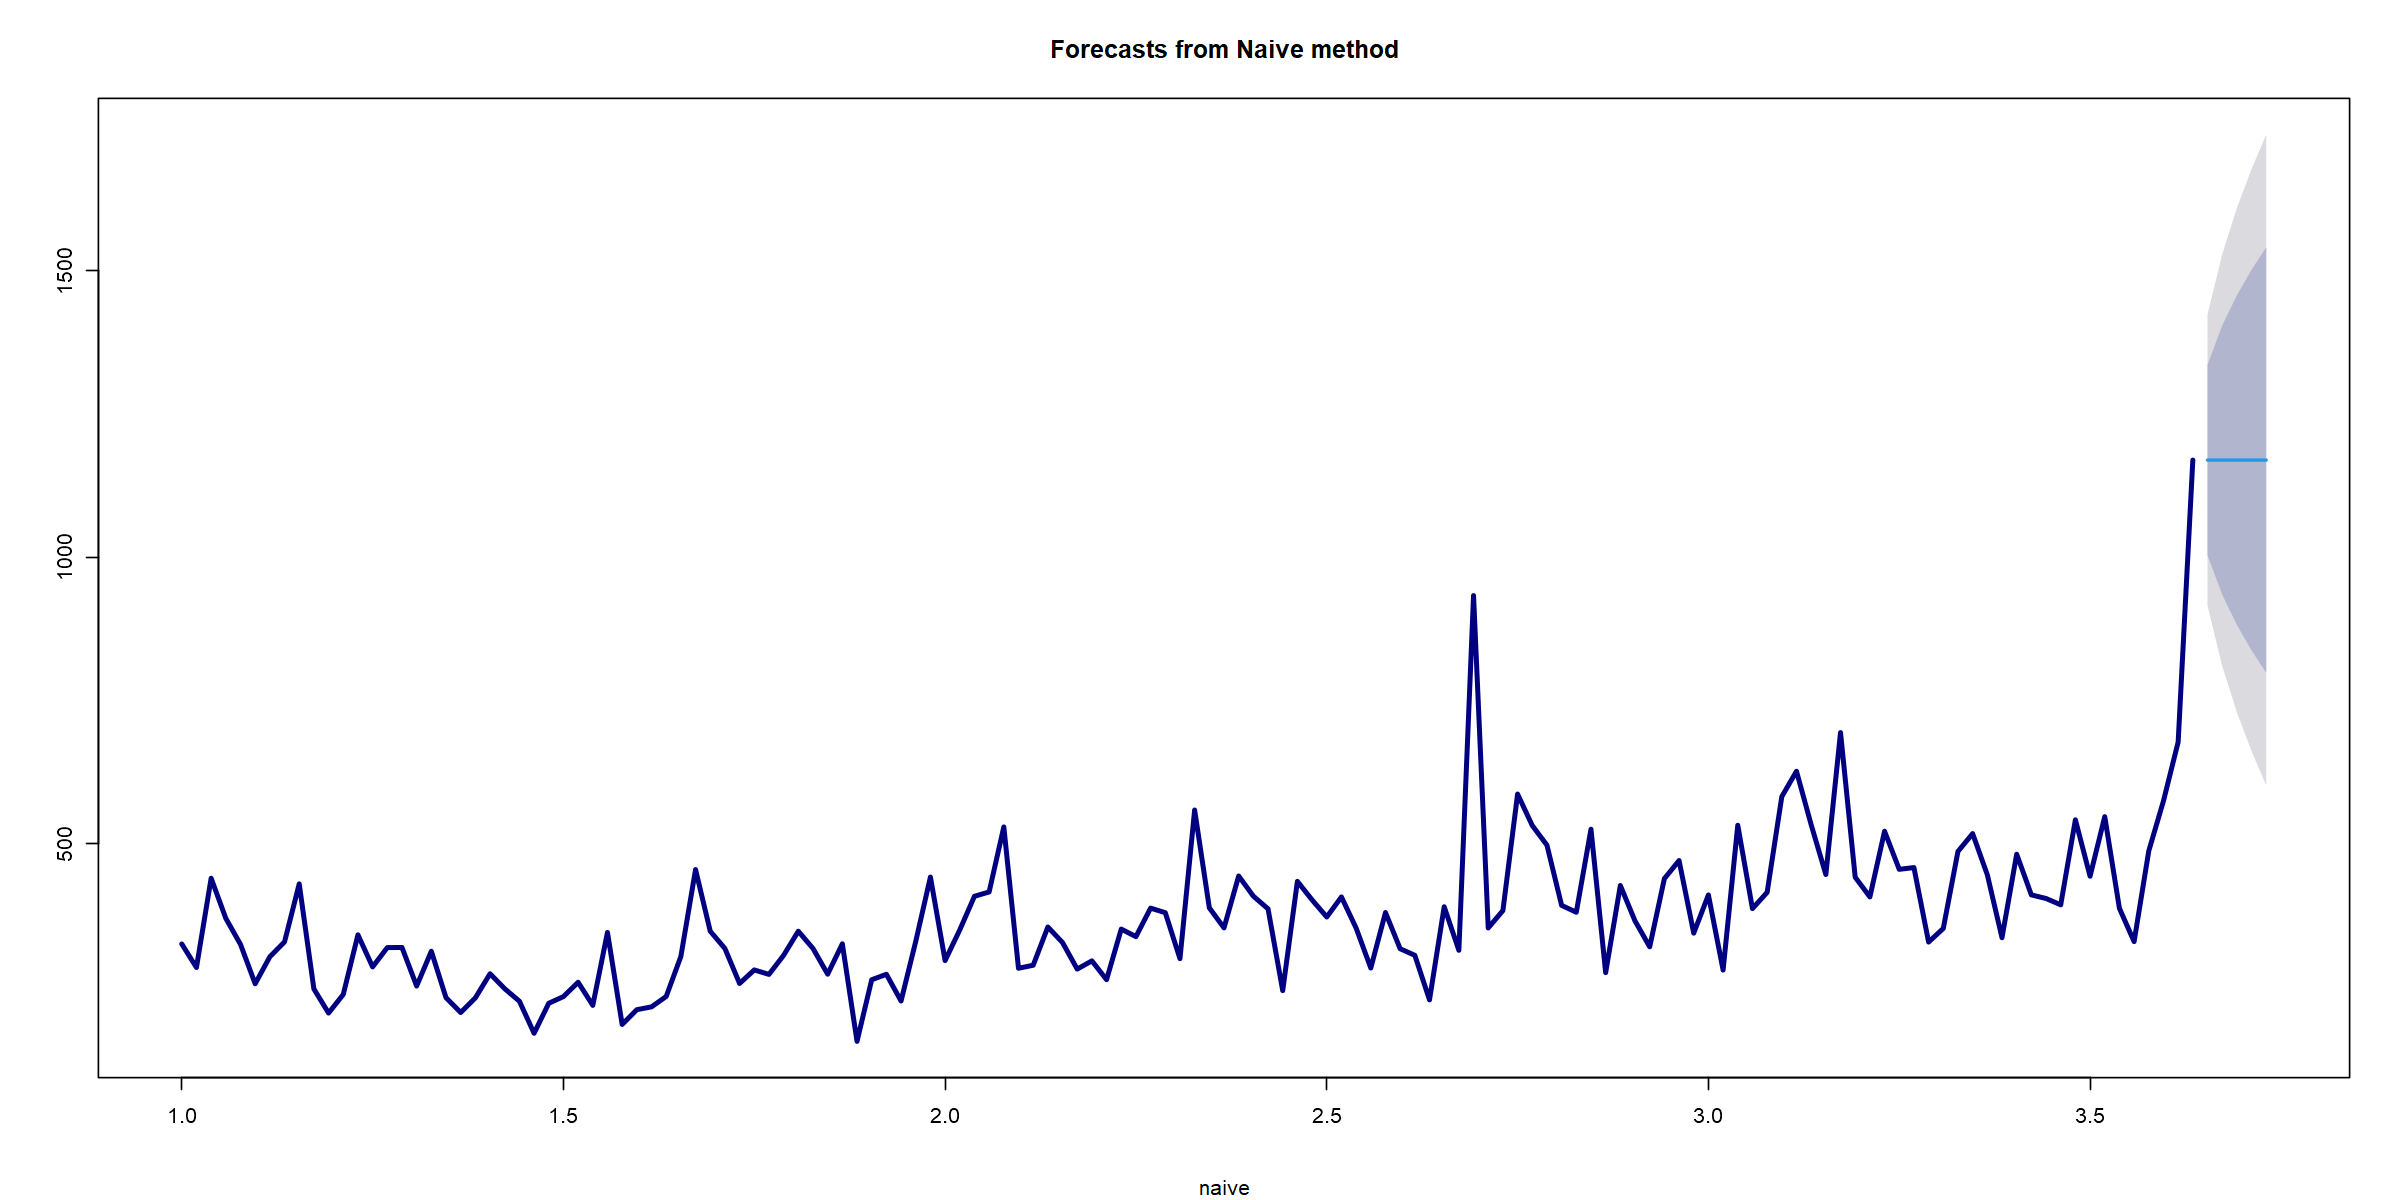

In [16]:
# Ver previsões
options(repr.plot.width = 20, repr.plot.height = 10)
predict_naive_model <- naive_model
plot(predict_naive_model,
     sub = "naive",
     col = "navyblue",
     lwd = 3)

In [17]:
# Ver resultados em tabela prev
prev$naive_prev <- naive_df$revenue
# Ver 10 linhas aleatórias
prev %>% sample_n(10)

,store_id,date,summed_revenue,avg_prev,naive_prev
,<chr>,<date>,<dbl>,<dbl>,<dbl>
S0003.282,S0003,2019-09-01,1030.02,874.90,5802.04
S0094.5981,S0094,2019-09-15,6713.85,3442.49,11205.97
S0142.8154,S0142,2019-09-01,1237.43,1379.17,8763.13
S0055.3282,S0055,2019-09-15,1600.22,1325.66,3996.16
S0132.7754,S0132,2019-09-22,2999.80,2104.17,14046.02
S0045.2769,S0045,2019-09-01,638.90,715.03,2248.80
S0089.5633,S0089,2019-09-08,485.59,314.91,1481.45
S0142.8157,S0142,2019-09-22,1794.39,1379.17,8763.13
S0131.7611,S0131,2019-09-22,1546.06,1268.94,7161.03


## Seasonal naïve method

In [18]:
# Previsoes com dados treino, para 5 periodos
# Armazenar previsões
snaive_prev <- list()
# loop
for (i in names(ts_train)) {
  data <- ts_train[[i]]
  # Tentar executar a previsão e lidar com erros
  snaive_forecast <- tryCatch(
    snaive(data, 5)$mean,
    error = function(e) {
      NaN 
    }
  )
  snaive_prev[[paste(i, '-snaive', sep = "")]] <- snaive_forecast
}
# Criar dataframe com resultados do modelo Snaive
snaive_df <- data.frame(snaive_prev)
snaive_df <- t(snaive_df)
snaive_df <- as.data.frame(snaive_df)
# Adicionar o índice como coluna
snaive_df <- rownames_to_column(snaive_df, var = "store_id")
# Transformação para o formato "long"
snaive_df <- snaive_df %>%
  pivot_longer(cols = -store_id, names_to = "prev", values_to = "revenue")
length(snaive_prev)

[1] 63

Neste caso, definimos cada previsão para ser igual ao último valor observado da mesma estação (por exemplo, o mesma semana do ano anterior).

In [19]:
# Resumo modelo loja S0062
summary(snaive(ts_train[['S0062']]), 5)


Forecast method: Seasonal naive method

Model Information:
Call: snaive(y = ts_train[["S0062"]]) 

Residual sd: 4621.0189 

Error measures:
                   ME     RMSE      MAE      MPE     MAPE MASE      ACF1
Training set 2298.086 4621.019 3041.201 19.49865 27.58381    1 0.2879481

Forecasts:
         Point Forecast       Lo 80    Hi 80      Lo 95    Hi 95
3.653846        6609.09   687.01601 12531.16 -2447.9406 15666.12
3.673077        8156.60  2234.52601 14078.67  -900.4306 17213.63
3.692308       15522.13  9600.05601 21444.20  6465.0994 24579.16
3.711538        7732.91  1810.83601 13654.98 -1324.1206 16789.94
3.730769        8404.39  2482.31601 14326.46  -652.6406 17461.42
3.750000       10215.95  4293.87601 16138.02  1158.9194 19272.98
3.769231       10237.69  4315.61601 16159.76  1180.6594 19294.72
3.788462        9725.77  3803.69601 15647.84   668.7394 18782.80
3.807692        8243.10  2321.02601 14165.17  -813.9306 17300.13
3.826923        8924.07  3001.99601 14846.14  -132.


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 29.646, df = 28, p-value = 0.3803

Model df: 0.   Total lags used: 28



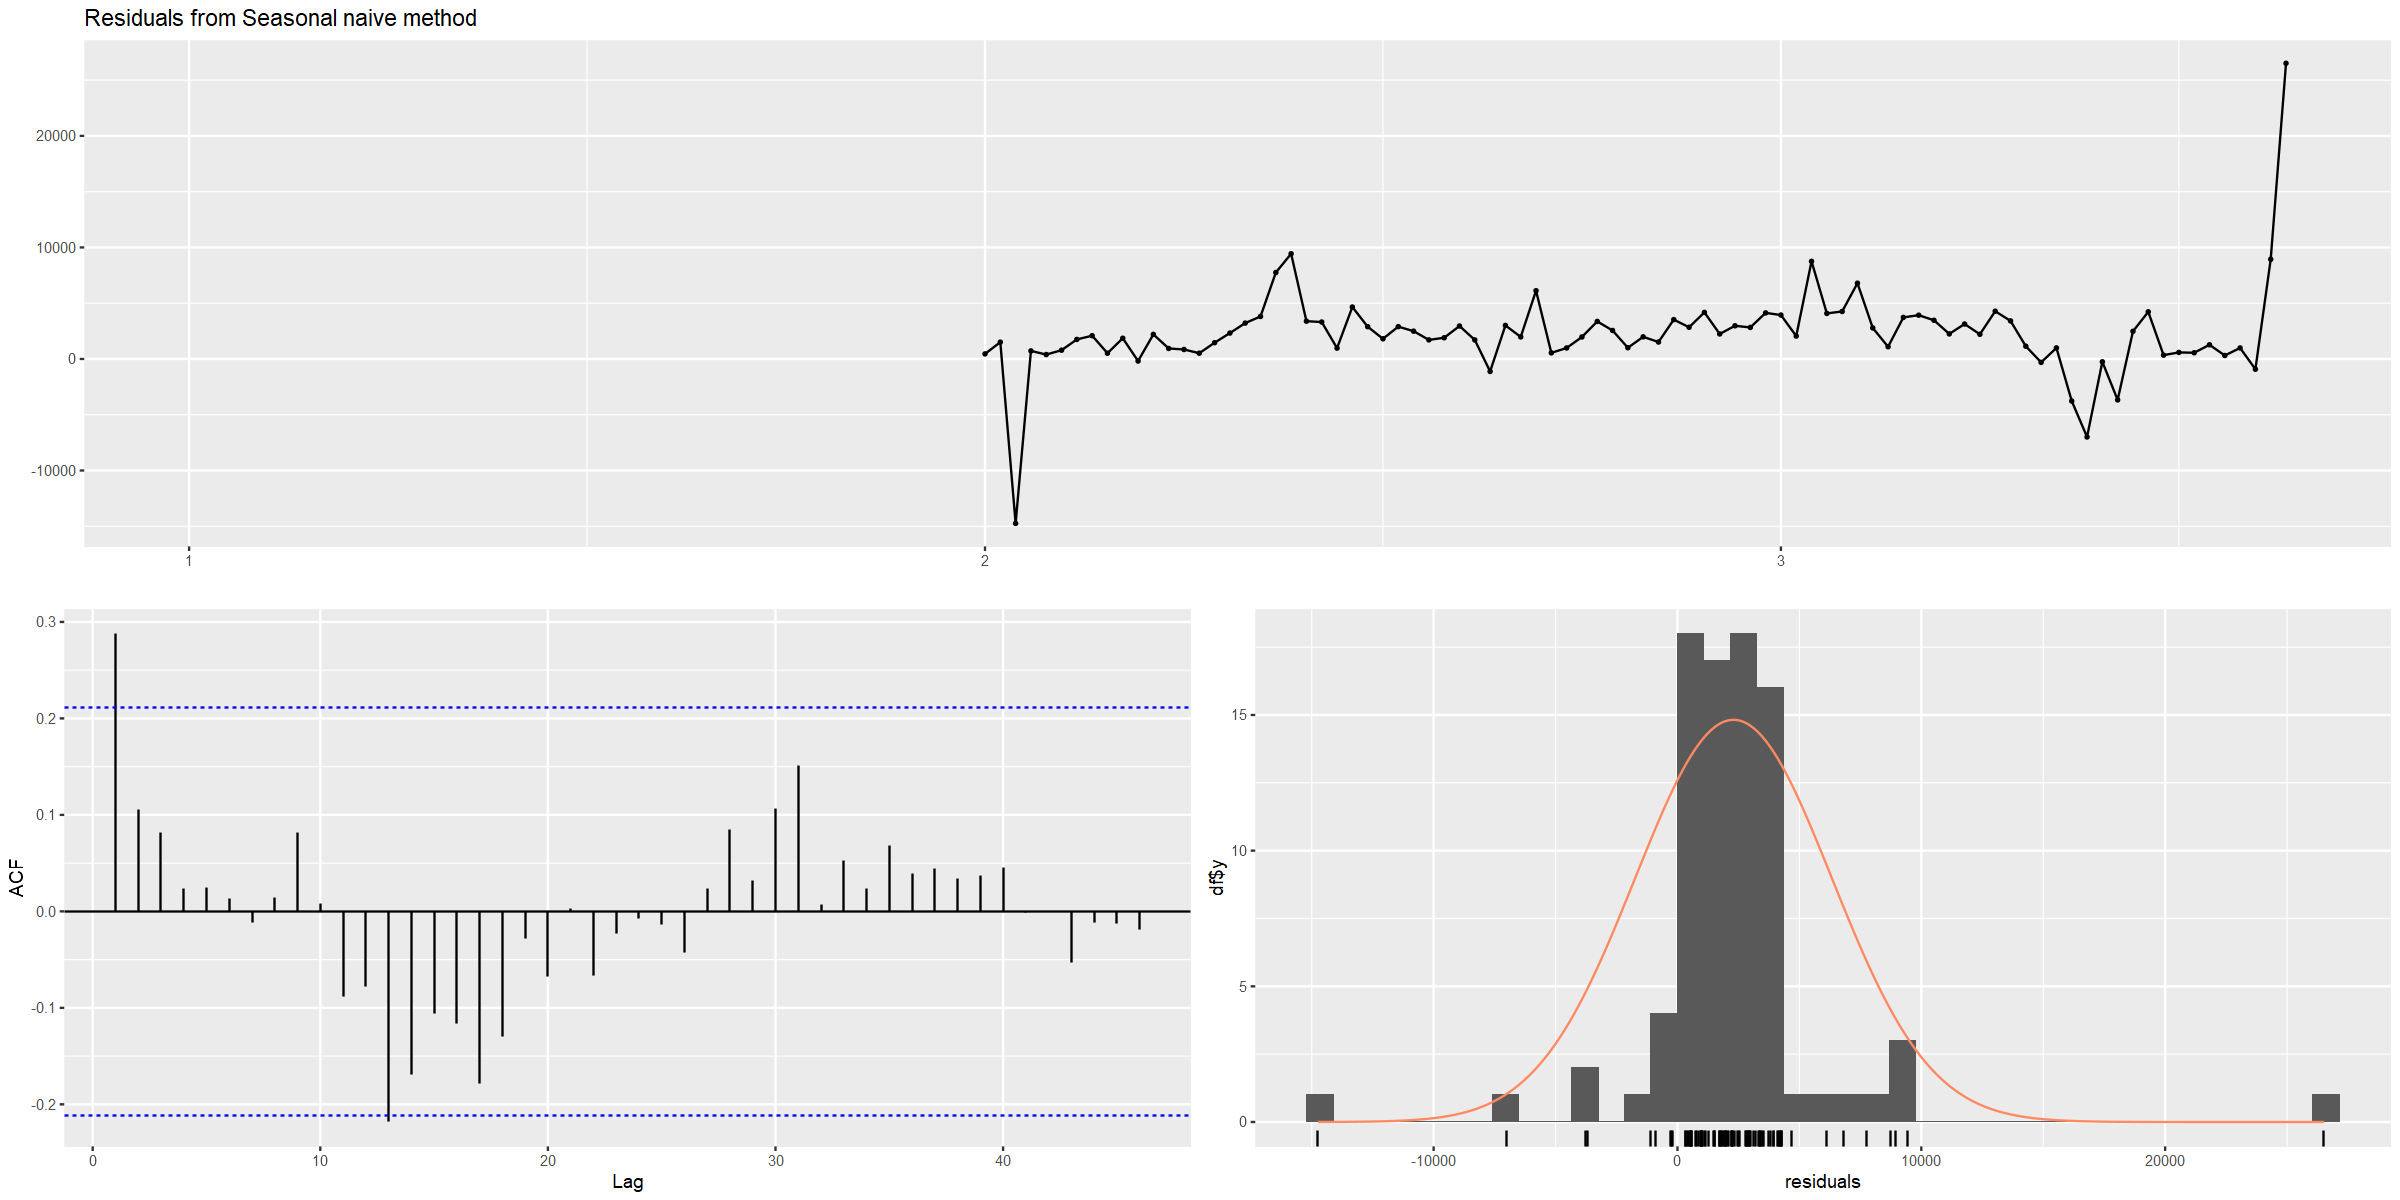

In [20]:
#Ver Resuiduos modelo ultima loja da lista
options(repr.plot.width = 20, repr.plot.height = 10)
checkresiduals(snaive(ts_train[['S0062']], 5))

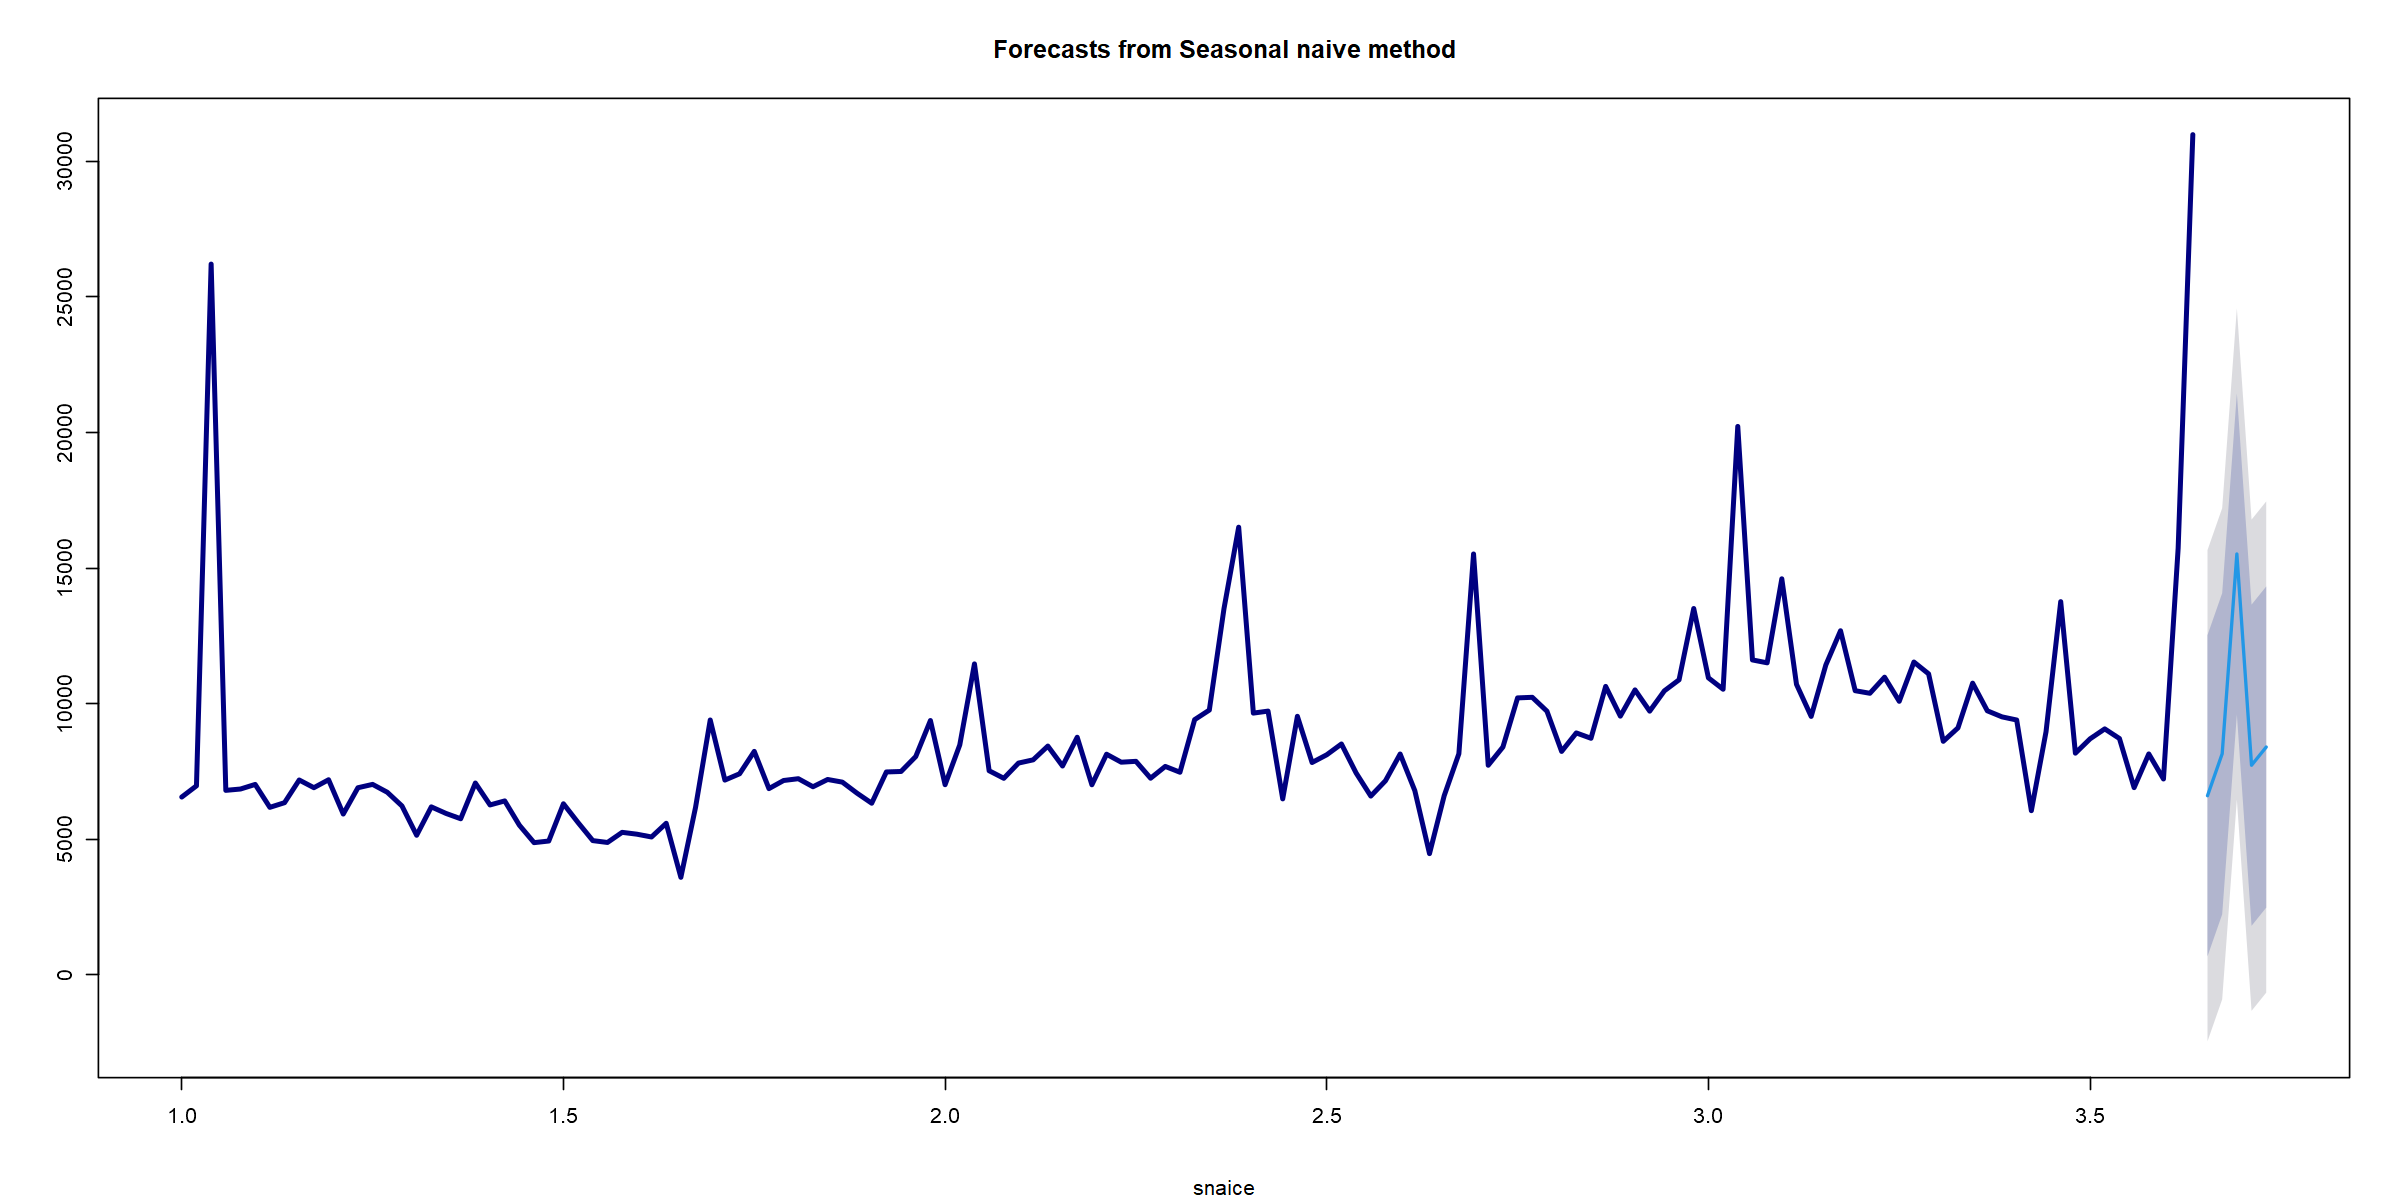

In [21]:
# Ver previsões
options(repr.plot.width = 20, repr.plot.height = 10)
predict_naive_model <- snaive(ts_train[['S0062']], 5)
plot(predict_naive_model,
     sub = "snaice",
     col = "navyblue",
     lwd = 3)

In [22]:
# Ver resultados em tabela prev
prev$snaive_prev <- snaive_df$revenue
# Ver 10 linhas aleatórias
prev %>% sample_n(10)

,store_id,date,summed_revenue,avg_prev,naive_prev,snaive_prev
,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
S0039.2343,S0039,2019-09-22,632.01,536.78,2320.69,674.93
S0142.8157,S0142,2019-09-22,1794.39,1379.17,8763.13,1422.84
S0071.4268,S0071,2019-09-29,2190.63,1762.15,4084.09,1598.58
S0030.1829,S0030,2019-09-22,667.16,308.95,1406.81,330.59
S0073.4551,S0073,2019-09-08,1761.06,902.40,4028.34,828.18
S0022.1399,S0022,2019-09-15,2268.27,1815.45,4224.28,1734.66
S0040.2483,S0040,2019-09-01,3278.88,3364.72,12070.80,3009.89
S0007.399,S0007,2019-09-22,946.83,785.58,1732.74,NaN
S0109.7038,S0109,2019-09-15,1425.80,1164.72,5009.27,NaN


## Random Walk with Drift (RWD)

In [23]:
# Modelo Random Walk with Drift (RWD).
# Previsoes com dados treino, para 5 periodos
# Armazenar previsões
rwf_prev <- list()
# loop
for (i in names(ts_train)){
    data <- ts_train[[i]]
    rwf_model <- rwf(data,5, drift = TRUE)
    rwf_forecast<- rwf_model$mean
    # Arredordar 2 casas decimais
    rwf_forecast <- round(rwf_forecast, 2)
    rwf_prev[[paste(i,'-rws', sep= "")]] <- rwf_forecast
}
length(rwf_prev)
# Criar dataframe com resultados do modelo Naive
rwf_df <- data.frame(rwf_prev)
rwf_df <- t(rwf_df)
rwf_df <- as.data.frame(rwf_df)
# Adicionar o índice como coluna
rwf_df <- rownames_to_column(rwf_df, var = "store_id")
# Transformação para o formato "long"
rwf_df <- rwf_df %>%
  pivot_longer(cols = -store_id, names_to = "prev", values_to = "revenue")
#rwf_forecast <- rwf(ts_cut, 5, drift=TRUE)
#rwf_forecast$mean

[1] 63

Drift method 'e uma variação do método Naive é permitir que as previsões aumentem ou diminuam ao longo do tempo, onde a quantidade de mudança ao longo do tempo (chamada de desvio ) é definida como a mudança média observada nos dados históricos.

Isso equivale a traçar uma linha entre a primeira e a última observação e extrapolá-la para o futuro.

In [24]:
# Resumo modelo loja exemplo
summary(rwf_model)


Forecast method: Random walk with drift

Model Information:
Call: rwf(y = data, h = 5, drift = TRUE) 

Drift: 6.1651  (se 11.1015)
Residual sd: 129.9395 

Error measures:
                       ME     RMSE      MAE       MPE     MAPE      MASE
Training set 5.804765e-15 129.4644 89.58924 -5.488702 24.07119 0.6577895
                   ACF1
Training set -0.4059113

Forecasts:
         Point Forecast     Lo 80    Hi 80    Lo 95    Hi 95
3.653846       1175.525 1008.3943 1342.656 919.9206 1431.130
3.673077       1181.690  944.4767 1418.904 818.9035 1544.477
3.692308       1187.855  896.2861 1479.425 741.9387 1633.772
3.711538       1194.020  856.1450 1531.896 677.2846 1710.756
3.730769       1200.186  821.0922 1579.279 620.4123 1779.959


	Ljung-Box test

data:  Residuals from Random walk with drift
Q* = 55.663, df = 28, p-value = 0.001414

Model df: 0.   Total lags used: 28



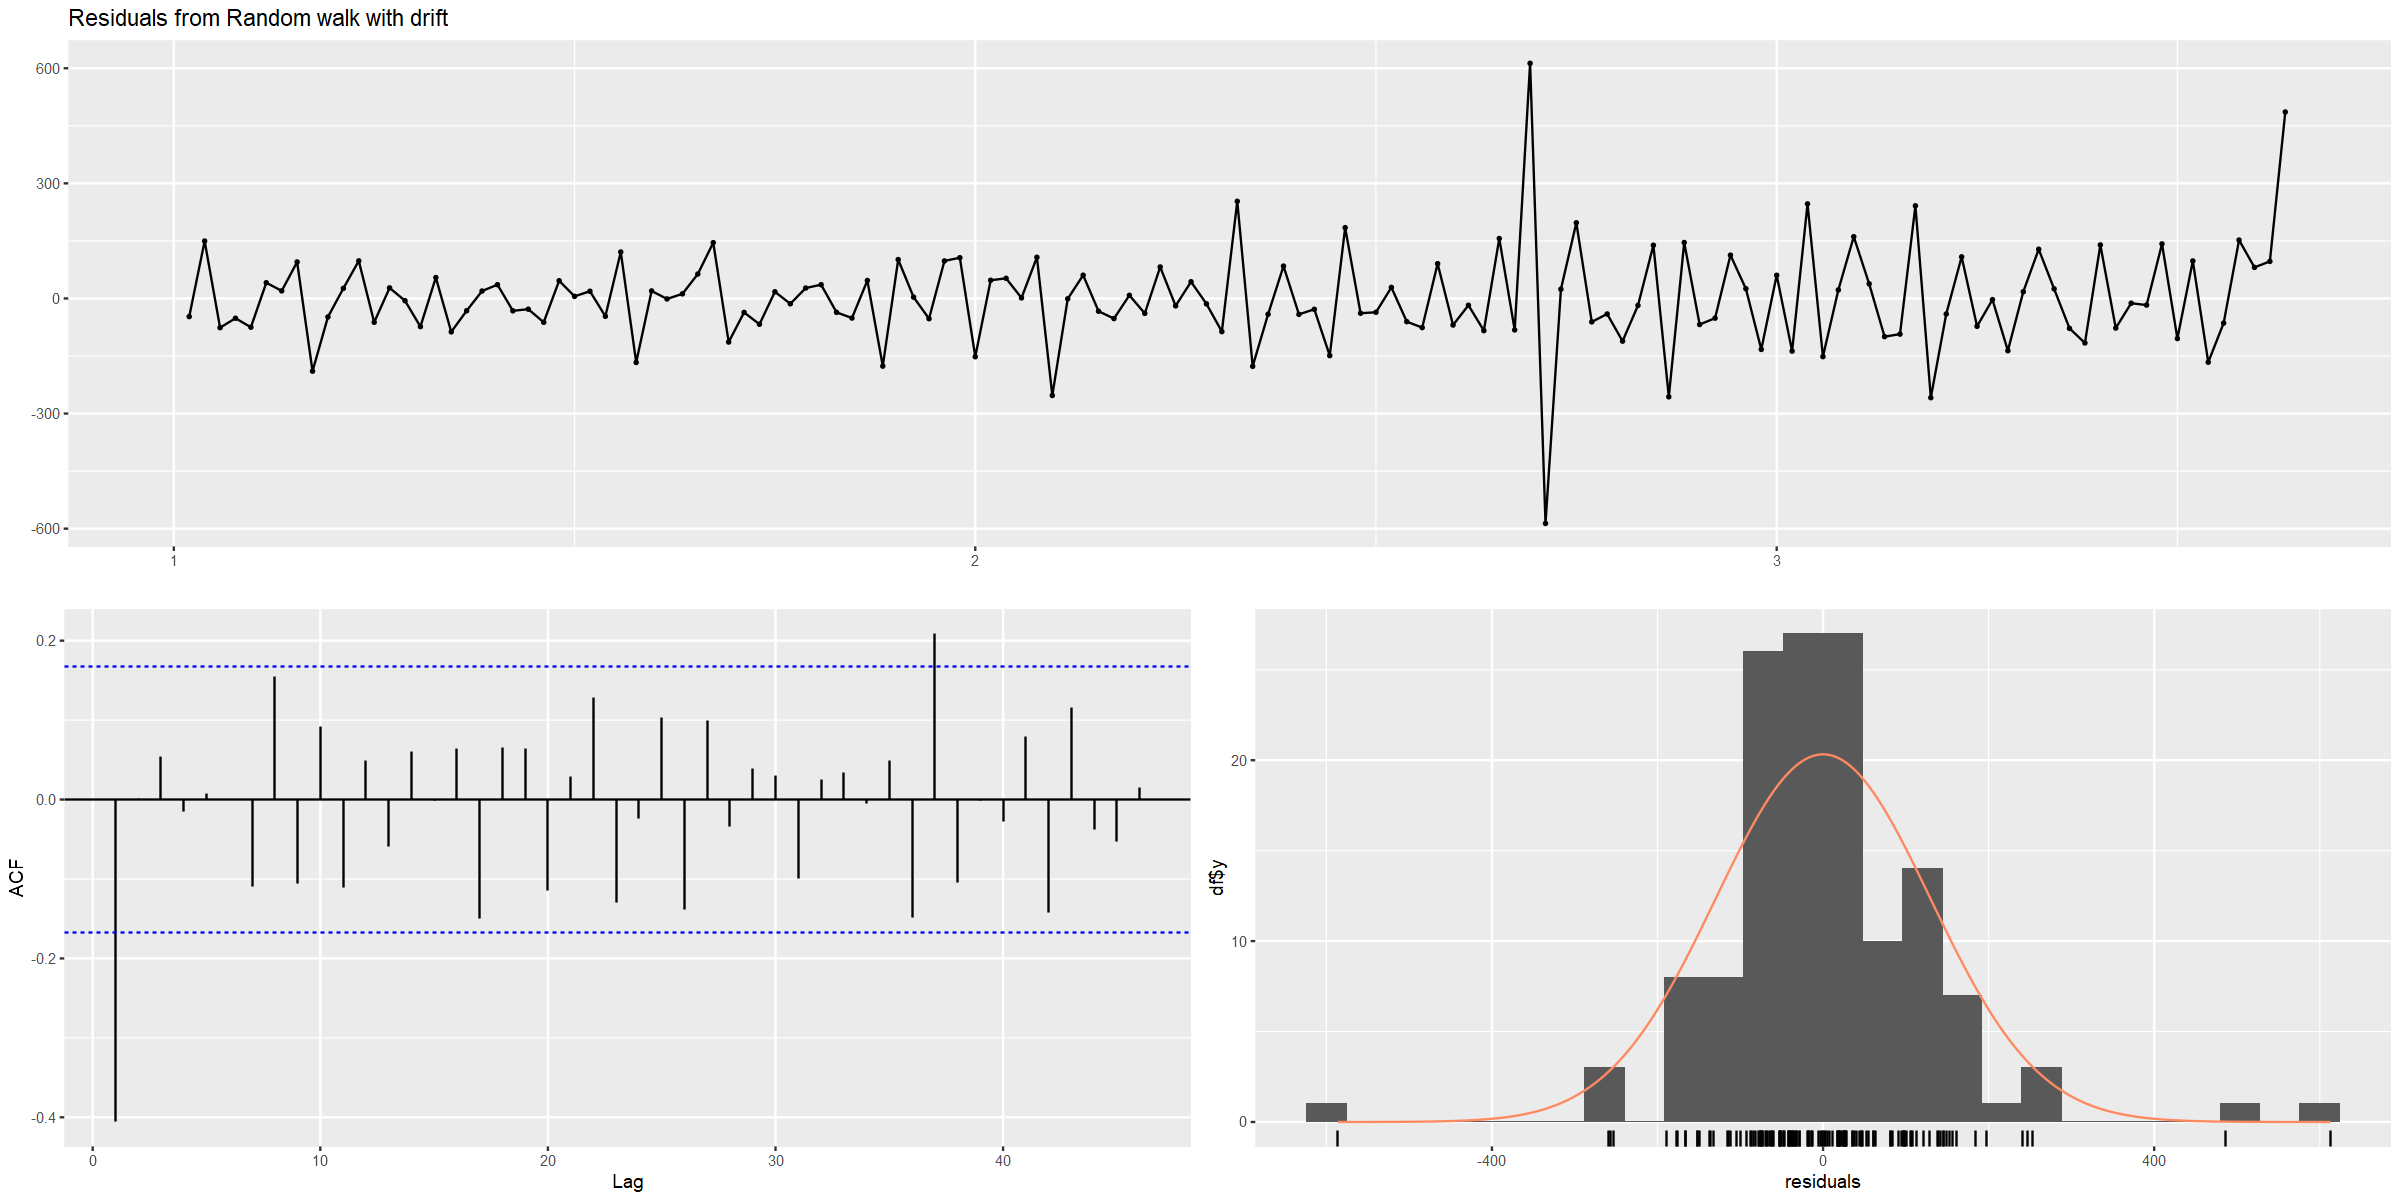

In [25]:
#Ver Resuiduos modelo ultima loja da lista
options(repr.plot.width = 20, repr.plot.height = 10)
checkresiduals(rwf_model)

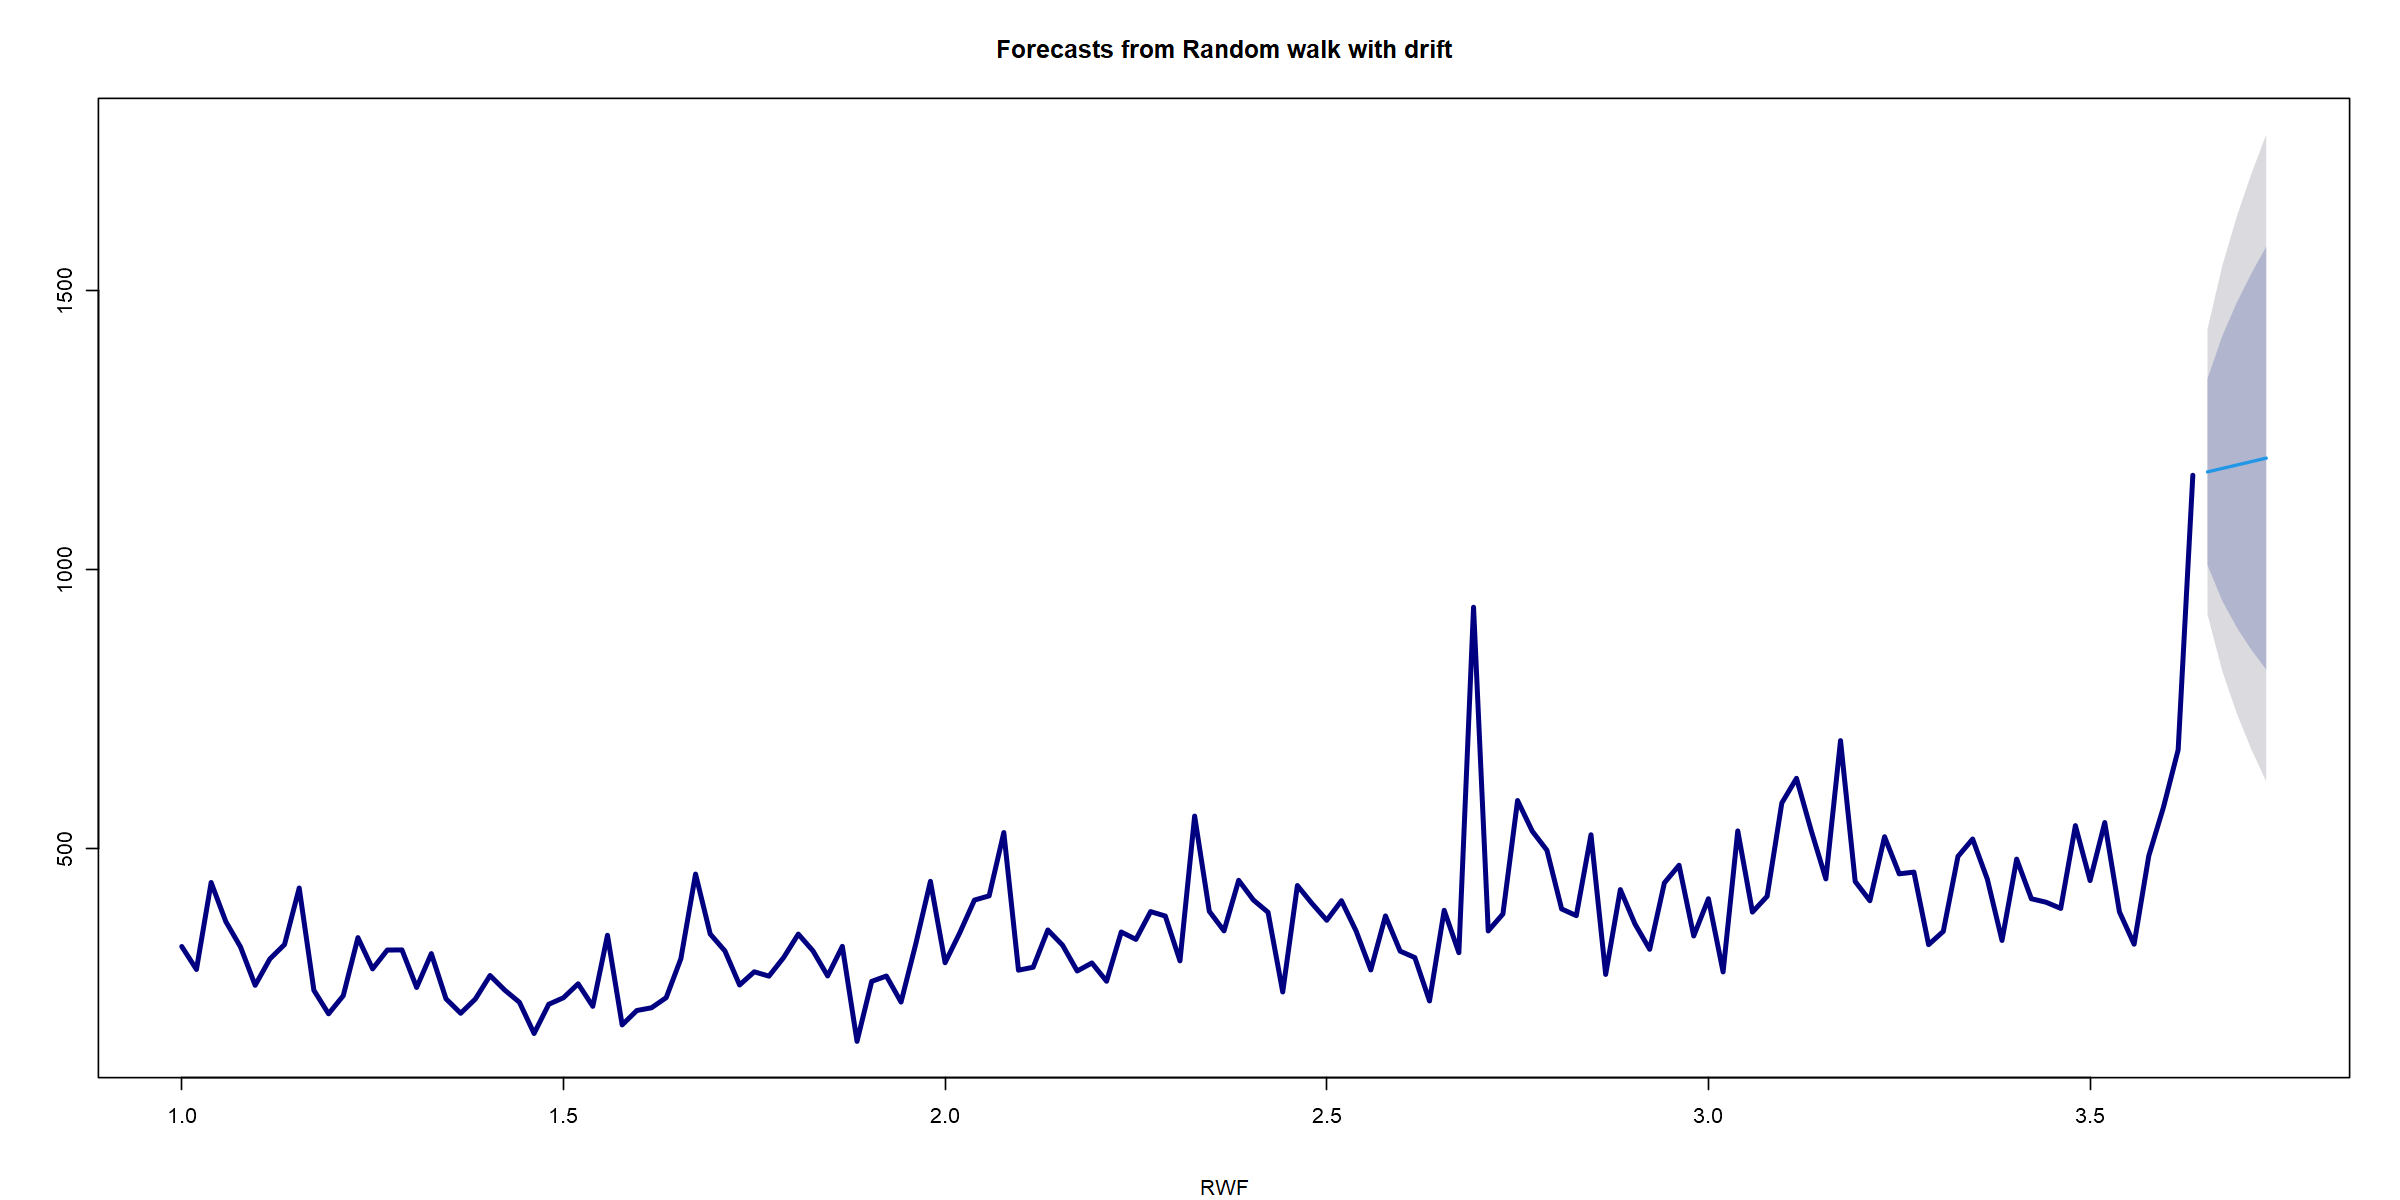

In [26]:
# Ver previsões
options(repr.plot.width = 20, repr.plot.height = 10)
predict_naive_model <- rwf_model
plot(predict_naive_model,
     sub = "RWF",
     col = "navyblue",
     lwd = 3)

In [27]:
# Ver resultados em tabela prev
prev$rwf_prev <- rwf_df$revenue
# Ver 10 linhas aleatórias
prev %>% sample_n(10)

,store_id,date,summed_revenue,avg_prev,naive_prev,snaive_prev,rwf_prev
,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S0122.7325,S0122,2019-09-22,1389.52,1162.85,4562.26,1399.93,4674.97
S0039.2342,S0039,2019-09-15,627.13,536.78,2320.69,722.61,2358.52
S0131.7611,S0131,2019-09-22,1546.06,1268.94,7161.03,1317.92,7348.44
S0143.8301,S0143,2019-09-29,704.87,371.50,1169.36,383.06,1200.19
S0010.539,S0010,2019-09-01,2947.91,2409.83,8302.20,2317.25,8344.73
S0026.1687,S0026,2019-09-29,12256.18,8756.18,37185.47,8858.60,38335.02
S0014.826,S0014,2019-09-08,1389.82,984.43,2727.56,1164.01,2752.88
S0126.7469,S0126,2019-09-29,5058.87,2866.36,7940.42,2344.09,8142.21
S0085.5204,S0085,2019-09-08,23264.68,14349.46,41291.57,14388.11,41772.23


In [28]:
# Fazer uma média de todos os modelos
prev$avg_models <-round(rowMeans(prev[, -(1:3)], na.rm = TRUE),2)
# ver dataframe final
head(prev,10)

,store_id,date,summed_revenue,avg_prev,naive_prev,snaive_prev,rwf_prev,avg_models
,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S0002.139,S0002,2019-09-01,4164.56,3262.42,16283.63,2381.59,16389.25,9579.22
S0002.140,S0002,2019-09-08,6267.91,3262.42,16283.63,2904.98,16494.88,9736.48
S0002.141,S0002,2019-09-15,5007.57,3262.42,16283.63,6333.15,16600.50,10619.92
S0002.142,S0002,2019-09-22,3074.56,3262.42,16283.63,2753.73,16706.12,9751.48
S0002.143,S0002,2019-09-29,5728.25,3262.42,16283.63,2741.11,16811.75,9774.73
S0003.282,S0003,2019-09-01,1030.02,874.90,5802.04,738.28,5840.40,3313.90
S0003.283,S0003,2019-09-08,1302.61,874.90,5802.04,884.21,5878.76,3359.98
S0003.284,S0003,2019-09-15,1255.40,874.90,5802.04,2603.89,5917.13,3799.49
S0003.285,S0003,2019-09-22,1343.15,874.90,5802.04,921.47,5955.49,3388.48


### ***Os métodos simples anteriores servem como referência para escolher um melhor que terá de apresentar melhores resultados.***

## Visualização de previsões e dados reais

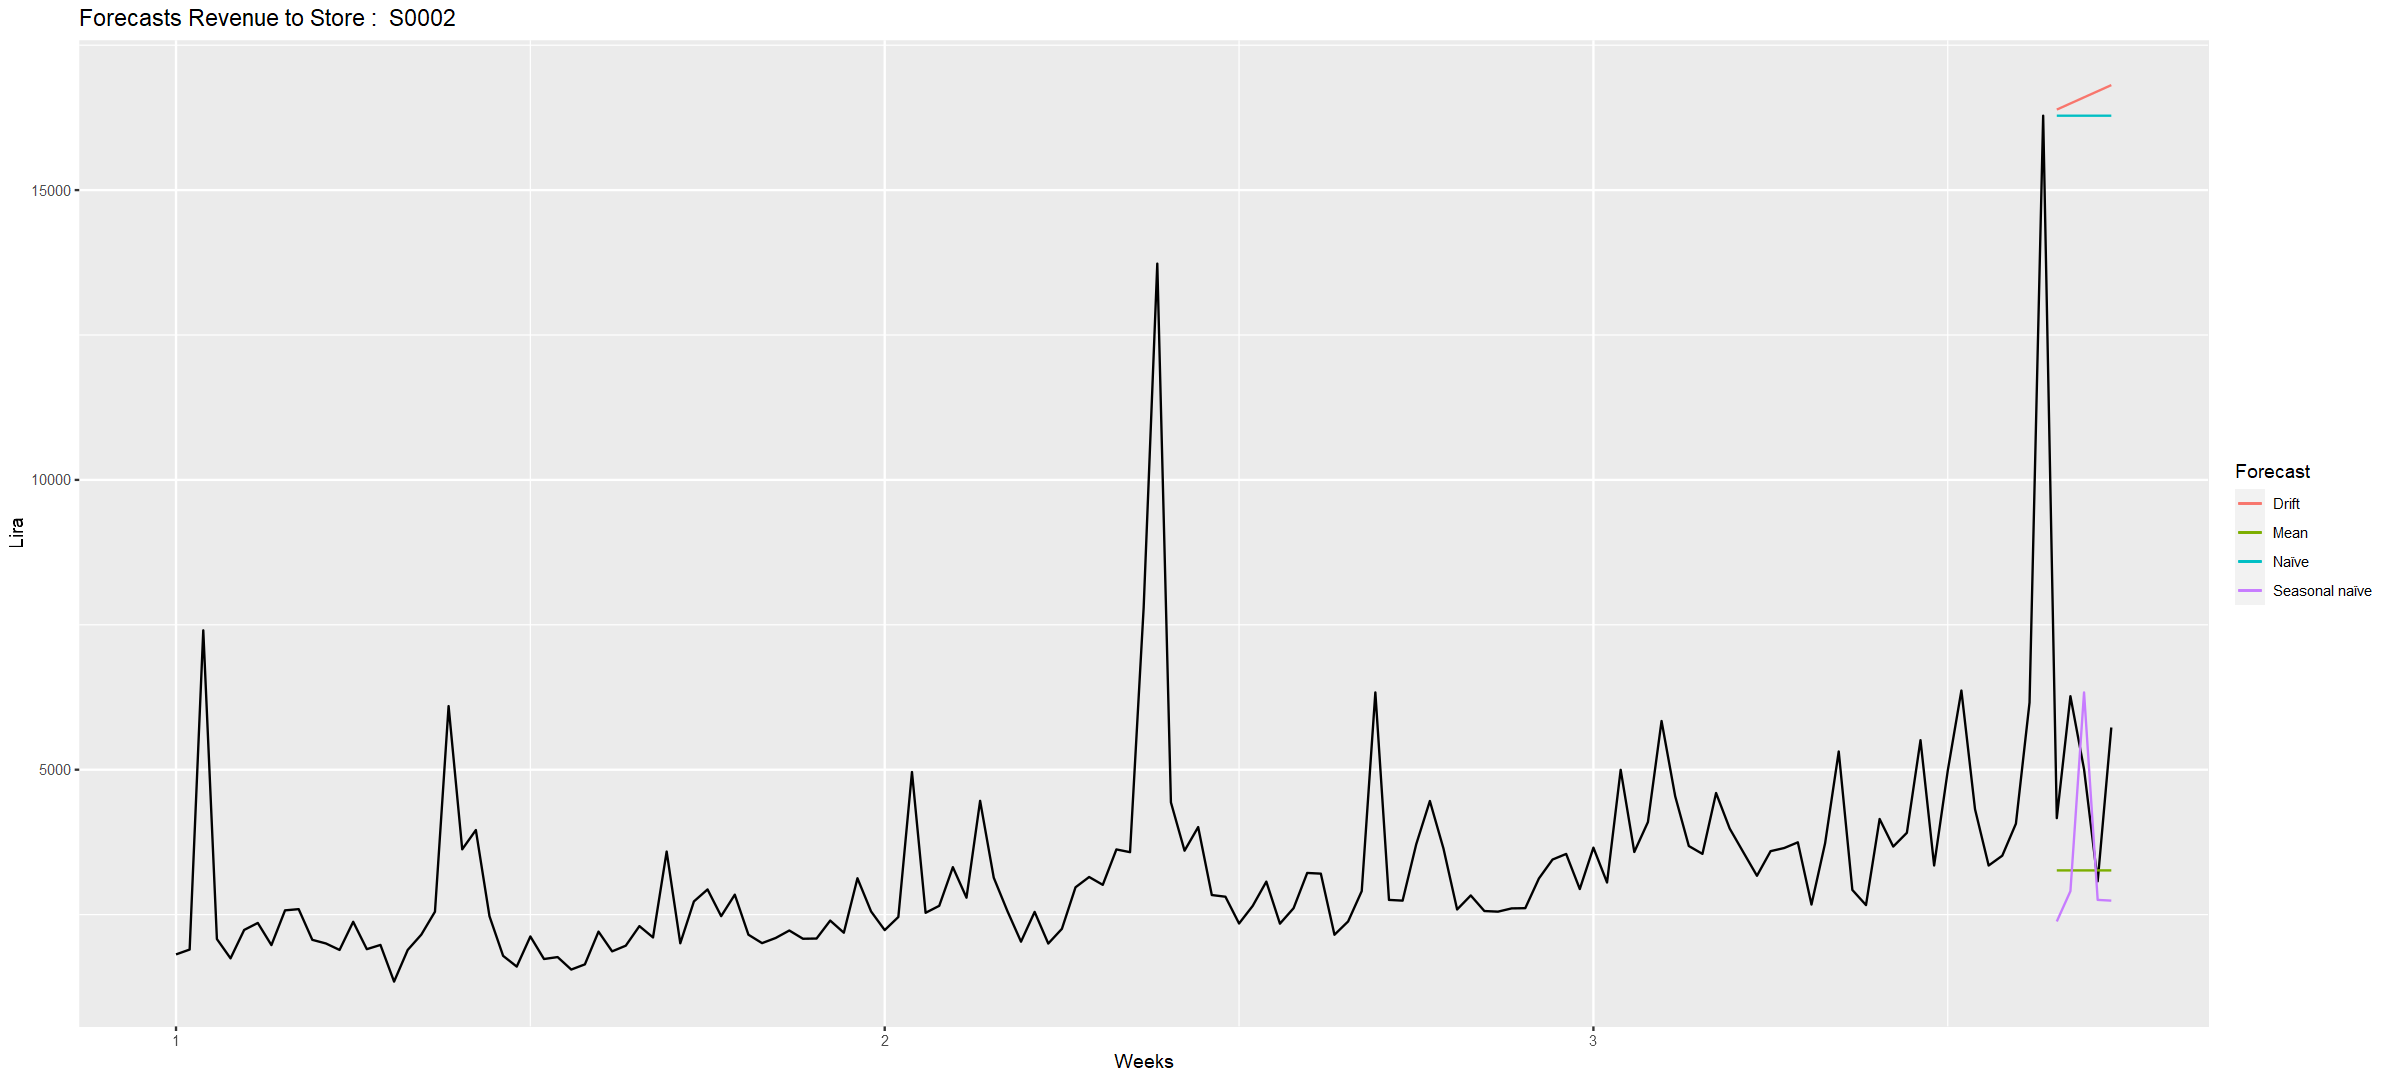

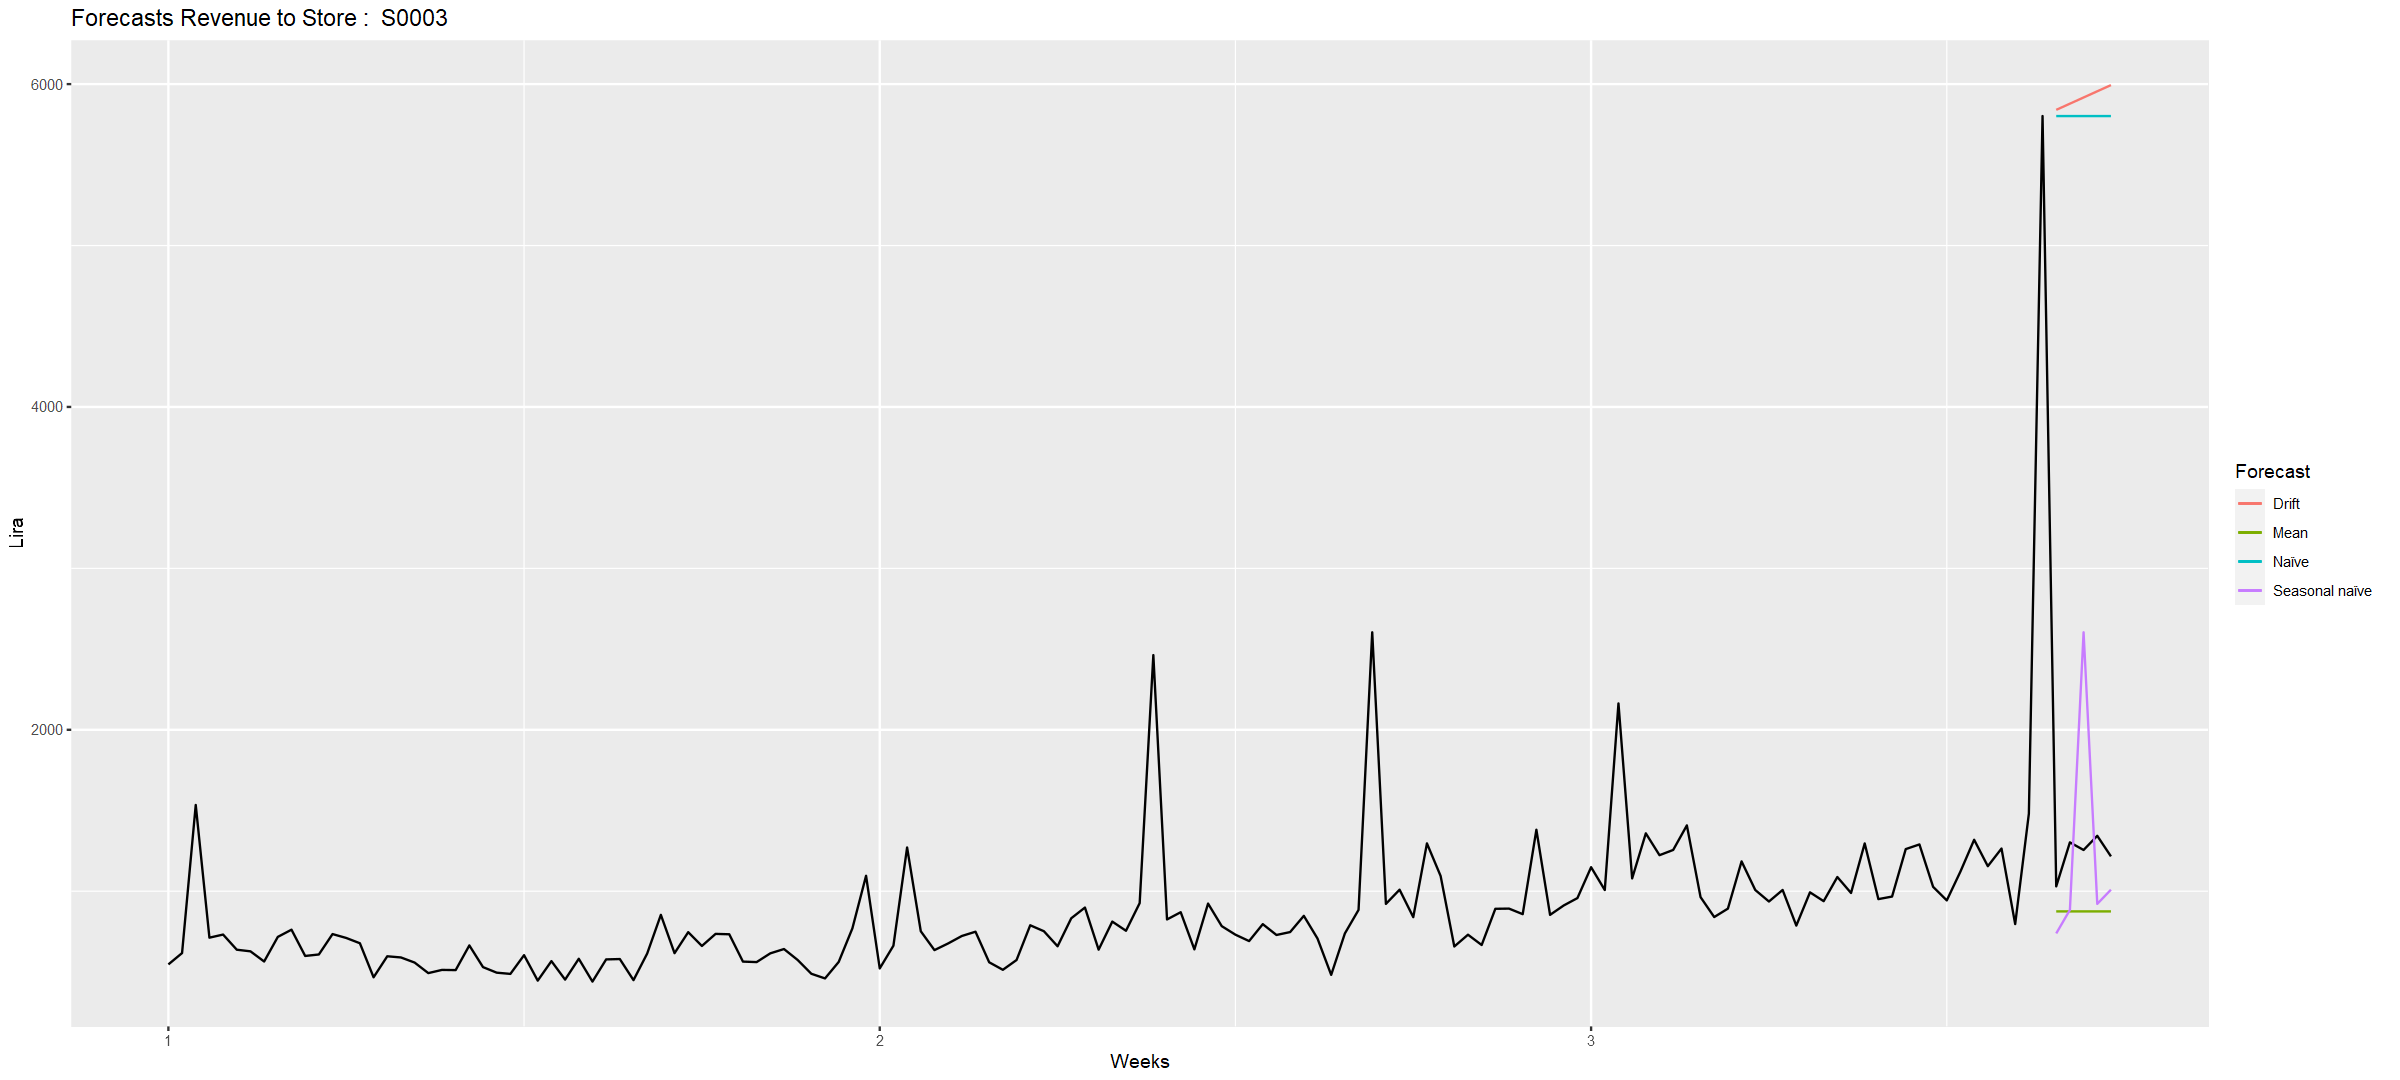

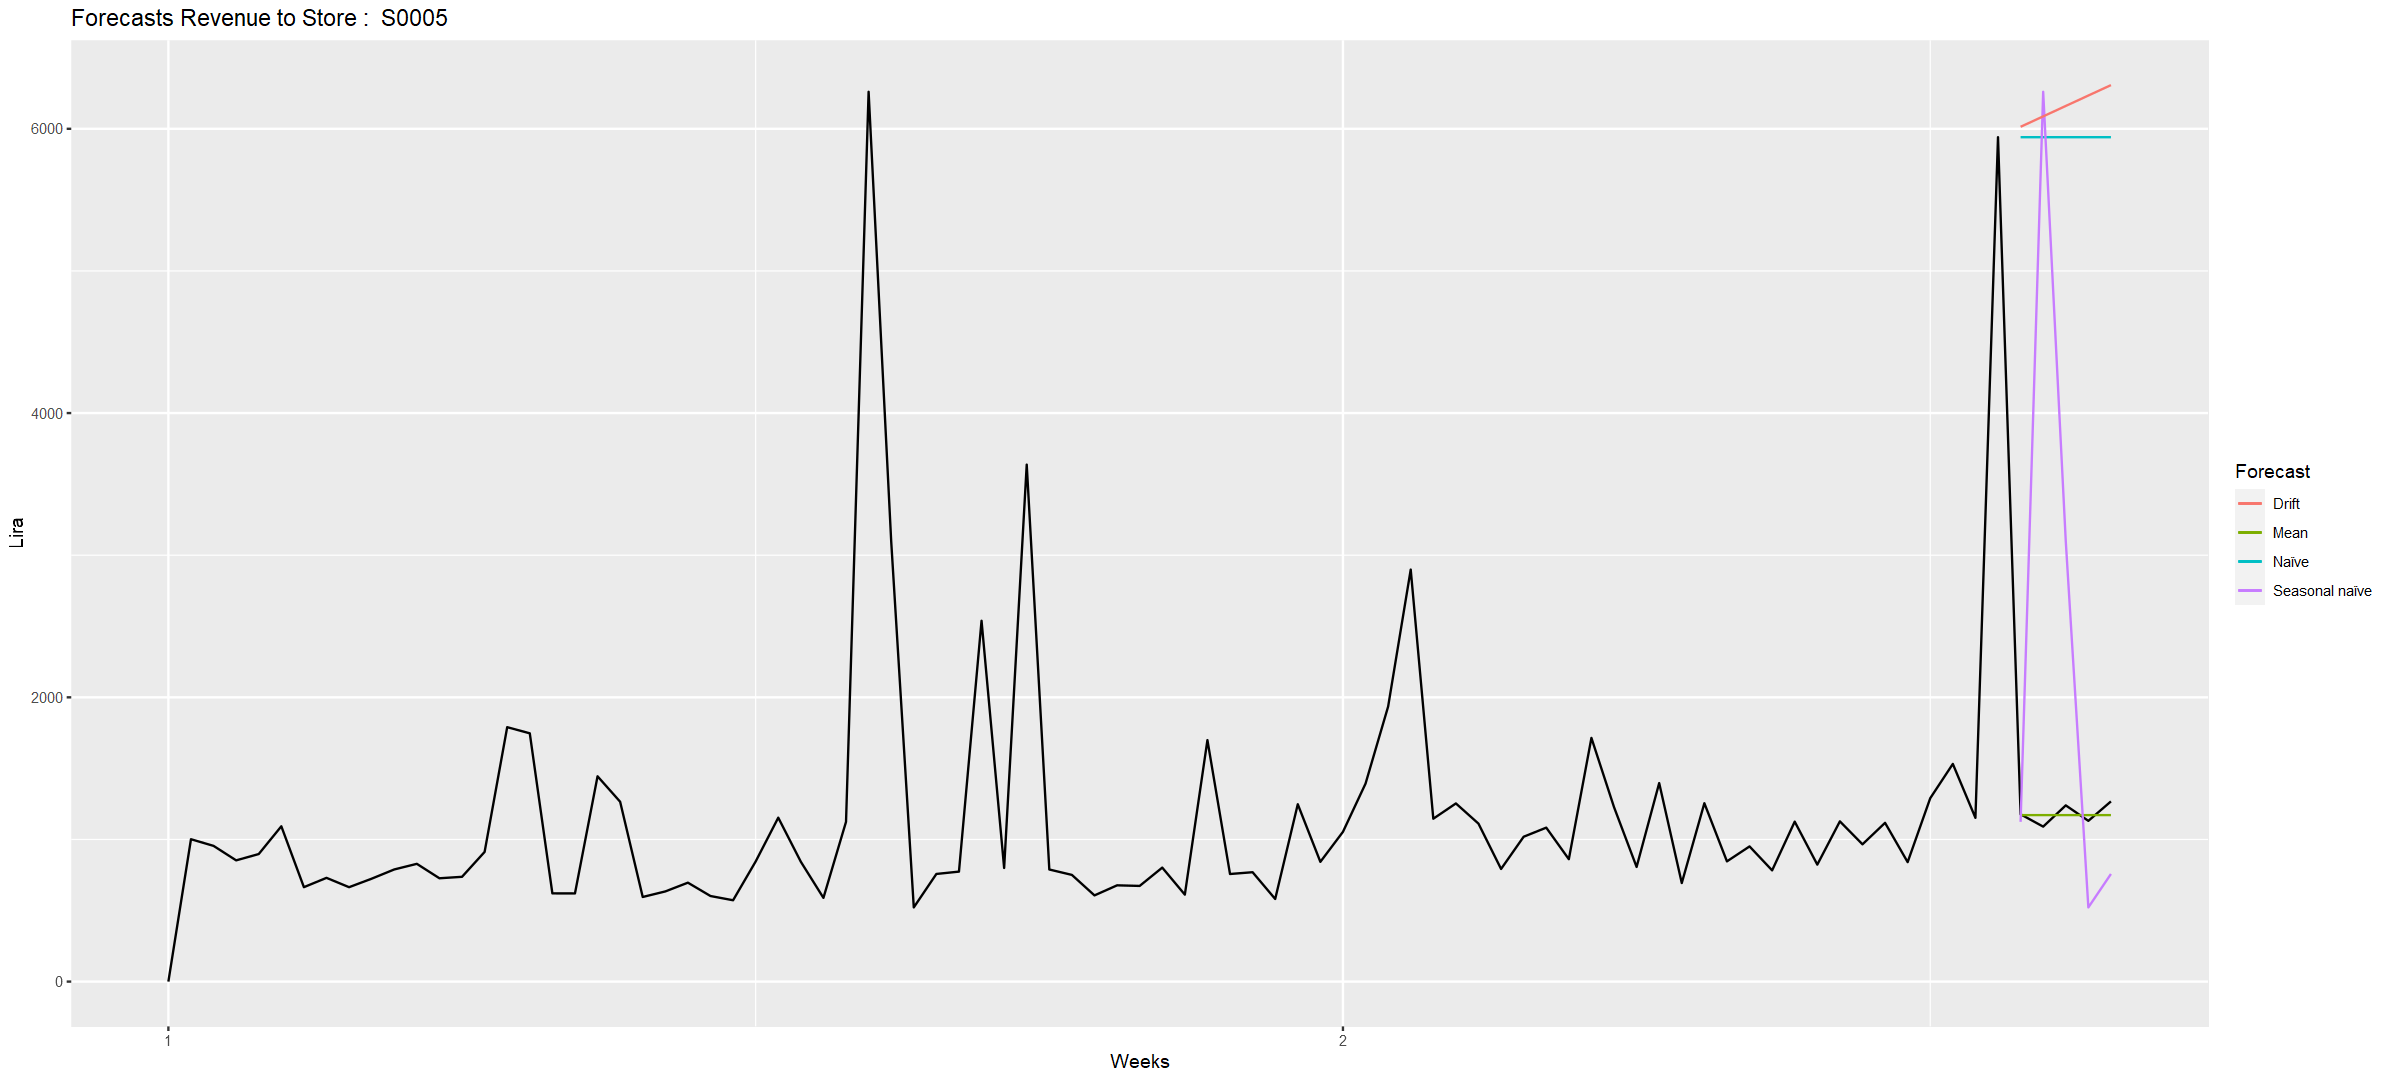

In [29]:
# Ver graficamente as previsões para 3 lojas
options(repr.plot.width = 20, repr.plot.height = 9)

for (i in 1:length(ts_train)) {
  ts_name <- names(ts_train)[i]
  ts <- ts_train[[ts_name]]
  
  if (i <= 3) {
    plot <- autoplot(ts_real[[i]]) +
      autolayer(avg_prev[[i]], series = "Mean") +
      autolayer(naive_prev[[i]], series = "Naïve") +
      autolayer(snaive_prev[[i]], series = "Seasonal naïve") +
      autolayer(rwf_prev[[i]], series = "Drift") +
      ggtitle(paste("Forecasts Revenue to Store : ",ts_name))+
      xlab("Weeks") + ylab("Lira") +
      guides(colour=guide_legend(title="Forecast"))
      
    print(plot)
  }
}

Pela visualização dos graficos conseguimos perceber que dependendo da loja existem modelos que podem fazer sentido e outros que não.

## Evaluation


In [30]:
# Criar dataframe para armazenar as métricas de accuracy

# Criar listas de dataframes com resultados para cada store
prev_list <- list() 
# criar variável com lista das lojas unicas
stores <- unique(prev$store_id)
# Loop para criar os dataframes separados
for (store in stores) {
  # filtrar dataframe
  df_store_prev <- prev[prev$store_id == store,]
  # Adicionar dataframe à lista
  prev_list[[store]] <- df_store_prev
}
# metricas avg
accuracy_list_avg <- list()
# Calcular a accuracy para modelos ets
for (ts in names(prev_list)) {

      # Obter os valores reais
      real_values <- prev_list[[ts]]$summed_revenue

      # Obter as previsões
      predicts <- prev_list[[ts]]$avg_prev

      # Calcular a accuracy
      accuracy <- accuracy(real_values, predicts)

      # Armazenar as métricas de accuracy na lista
      accuracy_list_avg[[ts]] <- accuracy
}
# metricas naive
accuracy_list_naive <- list()
# Calcular a accuracy para modelos ets
for (ts in names(prev_list)) {

      # Obter os valores reais
      real_values <- prev_list[[ts]]$summed_revenue

      # Obter as previsões
      predicts <- prev_list[[ts]]$naive_prev

      # Calcular a accuracy
      accuracy <- accuracy(real_values, predicts)

      # Armazenar as métricas de accuracy na lista
      accuracy_list_naive[[ts]] <- accuracy
}
# metricas snaive
accuracy_list_snaive <- list()
# Calcular a accuracy para modelos ets
for (ts in names(prev_list)) {

      # Obter os valores reais
      real_values <- prev_list[[ts]]$summed_revenue

      # Obter as previsões
      predicts <- prev_list[[ts]]$snaive_prev

      # Calcular a accuracy
      accuracy <- accuracy(real_values, predicts)

      # Armazenar as métricas de accuracy na lista
      accuracy_list_snaive[[ts]] <- accuracy
}
# metricas rwf
accuracy_list_rwf <- list()
# Calcular a accuracy para modelos ets
for (ts in names(prev_list)) {

      # Obter os valores reais
      real_values <- prev_list[[ts]]$summed_revenue

      # Obter as previsões
      predicts <- prev_list[[ts]]$rwf_prev

      # Calcular a accuracy
      accuracy <- accuracy(real_values, predicts)

      # Armazenar as métricas de accuracy na lista
      accuracy_list_rwf[[ts]] <- accuracy
}
# metricas avg_models
accuracy_list_avgmodels <- list()
# Calcular a accuracy para modelos ets
for (ts in names(prev_list)) {

      # Obter os valores reais
      real_values <- prev_list[[ts]]$summed_revenue

      # Obter as previsões
      predicts <- prev_list[[ts]]$avg_models

      # Calcular a accuracy
      accuracy <- accuracy(real_values, predicts)

      # Armazenar as métricas de accuracy na lista
      accuracy_list_avgmodels[[ts]] <- accuracy
}
# Converter as lista de accuracy em um DataFrame
df_accuracy_avg <- do.call(rbind, accuracy_list_avg)
df_accuracy_naive <- do.call(rbind, accuracy_list_naive)
df_accuracy_snaive <- do.call(rbind, accuracy_list_snaive)
df_accuracy_rwf <- do.call(rbind, accuracy_list_rwf)
df_accuracy_avgmodels <- do.call(rbind, accuracy_list_avgmodels)
# Adicionar coluna "store_id" com os valores 
df_accuracy_avg <- cbind(store_id = names(prev_list), df_accuracy_avg)
df_accuracy_naive <- cbind(store_id = names(prev_list), df_accuracy_naive)
df_accuracy_snaive <- cbind(store_id = names(prev_list), df_accuracy_snaive)
df_accuracy_rwf <- cbind(store_id = names(prev_list), df_accuracy_rwf)
df_accuracy_avgmodels <- cbind(store_id = names(prev_list), df_accuracy_avgmodels)
# Criar dataframes
df_accuracy_avg <- as.data.frame(df_accuracy_avg, row.names = NULL)
df_accuracy_naive <- as.data.frame(df_accuracy_naive, row.names = NULL)
df_accuracy_snaive <- as.data.frame(df_accuracy_snaive, row.names = NULL)
df_accuracy_rwf <- as.data.frame(df_accuracy_rwf, row.names = NULL)
df_accuracy_avgmodels <- as.data.frame(df_accuracy_avgmodels, row.names = NULL)
# Adicionar sufixo  colunas
colnames(df_accuracy_avg)[-1] <- paste(colnames(df_accuracy_avg)[-1], "_avg", sep = "")
colnames(df_accuracy_naive)[-1] <- paste(colnames(df_accuracy_naive)[-1], "_naive", sep = "")
colnames(df_accuracy_snaive)[-1] <- paste(colnames(df_accuracy_snaive)[-1], "_snaive", sep = "")
colnames(df_accuracy_rwf)[-1] <- paste(colnames(df_accuracy_rwf)[-1], "_rwf", sep = "")
colnames(df_accuracy_avgmodels)[-1] <- paste(colnames(df_accuracy_avgmodels)[-1], "_avgmodels", sep = "")
# Merge dataframes
df_combined <- Reduce(function(x, y) merge(x, y, by = "store_id"), 
                      list(df_accuracy_avg, df_accuracy_naive, df_accuracy_snaive, 
                           df_accuracy_rwf, df_accuracy_avgmodels))
head(df_combined)

,store_id,ME_avg,RMSE_avg,MAE_avg,MPE_avg,MAPE_avg,ME_naive,RMSE_naive,MAE_naive,MPE_naive,⋯,ME_rwf,RMSE_rwf,MAE_rwf,MPE_rwf,MAPE_rwf,ME_avgmodels,RMSE_avgmodels,MAE_avgmodels,MPE_avgmodels,MAPE_avgmodels
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,S0002,-1586.15,1949.76840730893,1661.294,-48.6188167066165,50.9221375543308,11435.06,11491.1410322578,11435.06,70.2242681760762,⋯,11751.93,11807.5686510433,11751.93,70.7897390009482,70.7897390009482,5043.796,5173.06977257798,5043.796,50.9730236376107,50.9730236376107
2,S0003,-354.484,370.731244056931,354.484,-40.517087667162,40.517087667162,4572.656,4573.94421078788,4572.656,78.8111767585194,⋯,4687.742,4688.63832274361,4687.742,79.2306689682782,79.2306689682782,2227,2234.44483741264,2227,64.3845176481248,64.3845176481248
3,S0005,-9.91800000000003,66.6703623808961,58.45,-0.846765931288849,4.99026705826105,4759.642,4760.09858497279,4759.642,80.1173234761414,⋯,4979.672,4980.53539916744,4979.672,80.830465524004,80.830465524004,2725.122,2782.70742095176,2725.122,69.1728184437976,69.1728184437976
4,S0007,-107.19,164.806417654168,147.086,-13.644695638891,18.7232363349372,839.97,849.247349186325,839.97,48.4764015374494,⋯,1016.48,1019.83804061233,1016.48,53.3627646320438,53.3627646320438,583.086,592.602325425745,583.086,39.6064787571878,39.6064787571878
5,S0010,-473.092,646.007949115179,537.96,-19.6317582568065,22.3235663926501,5419.278,5437.10256213178,5419.278,65.275204162752,⋯,5546.866,5563.32391492892,5546.866,65.8089360319888,65.8089360319888,2499.78,2537.02940269127,2499.78,46.4512761399268,46.4512761399268
6,S0012,-399.828,488.364802417209,399.828,-29.9611087381696,29.9611087381696,4096.722,4106.30842679164,4096.722,70.2571410931841,⋯,4206.582,4215.857407202,4206.582,70.8097548012328,70.8097548012328,1962.162,1975.93300867717,1962.162,53.1732552232256,53.1732552232256


In [31]:
# Exportar resultados
# Accuracy dataframe
path <- file.path("C:", "Users", "Egomes", "Desktop", "PG_Analytics_Data_science_empresarial", "Isla_gaia", "14-ProjetoII", "projetoII", "dataStaging", "accuracySimpleMethods.csv")
write.csv(df_combined, file = path, row.names = FALSE)
# Resultado previsões em dados teste
path <- file.path("C:", "Users", "Egomes", "Desktop", "PG_Analytics_Data_science_empresarial", "Isla_gaia", "14-ProjetoII", "projetoII", "dataStaging", "resultSimpleMethods.csv")
write.csv(prev, file = path, row.names = FALSE)
print('Exportação concluida!')

[1] "Exportação concluida!"
